# Makhota compuation of COVID-19 recent stats


[Choosing Colormaps in Matplotlib](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

[seaborn color palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import seaborn as sns

from makhota import llt
from makhota import parameters
from makhota import utilities

sns.set()

In [3]:
# Parameters
num_of_interesting_places = 15
colname_of_interesting_places = 'deaths'
skip_days = 5

extra_places = ['Singapore', 'China(Hong Kong)', 'Korea, South', 'New Zealand', 'Switzerland',
               'Indonesia', 'India']
#skip_place = 'China(Hubei)'

tags = ['confirmed_cases','deaths','recovered_cases']

# Compuation of remaning days
remaning_days_tail_number = 5

global_threshold = 0.0005
trend_threshold = 0.0005
convx_threshold = -0.0005


## Load data from files

In [4]:
global_time_series = utilities.load_latest_global_time_series()

global_time_series.tail()

place          Afghanistan                                Albania         \
tag        confirmed_cases deaths recovered_cases confirmed_cases deaths   
date                                                                       
2020-04-24          1351.0   43.0           188.0           678.0   27.0   
2020-04-25          1463.0   47.0           188.0           712.0   27.0   
2020-04-26          1531.0   50.0           207.0           726.0   28.0   
2020-04-27          1703.0   57.0           220.0           736.0   28.0   
2020-04-28          1828.0   58.0           228.0           750.0   30.0   

place                              Algeria                         \
tag        recovered_cases confirmed_cases deaths recovered_cases   
date                                                                
2020-04-24           394.0          3127.0  415.0          1408.0   
2020-04-25           403.0          3256.0  419.0          1479.0   
2020-04-26           410.0          3382.0  425.0          1508.0   
2020-04-27           422.0          3517.0  432.0          1558.0   
2020-04-28           431.0          3649.0  437.0          1651.0   

place              Andorra  ...           Yemen          Zambia         \
tag        confirmed_cases  ... recovered_cases confirmed_cases deaths   
date                        ...                                          
2020-04-24           731.0  ...             1.0            84.0    3.0   
2020-04-25           738.0  ...             1.0            84.0    3.0   
2020-04-26           738.0  ...             1.0            88.0    3.0   
2020-04-27           743.0  ...             1.0            88.0    3.0   
2020-04-28           743.0  ...             1.0            95.0    3.0   

place                             Zimbabwe                         \
tag        recovered_cases confirmed_cases deaths recovered_cases   
date                                                                
2020-04-24            37.0            29.0    4.0             2.0   
2020-04-25            37.0            31.0    4.0             2.0   
2020-04-26            42.0            31.0    4.0             2.0   
2020-04-27            42.0            32.0    4.0             5.0   
2020-04-28            42.0            32.0    4.0             5.0   

place                World                            
tag        confirmed_cases    deaths recovered_cases  
date                                                  
2020-04-24       2811603.0  196718.0        790081.0  
2020-04-25       2897624.0  202868.0        817838.0  
2020-04-26       2972363.0  206568.0        865733.0  
2020-04-27       3041764.0  211167.0        893967.0  
2020-04-28       3116398.0  217153.0        928658.0  

[5 rows x 798 columns]

In [5]:
global_time_series.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

In [6]:
global_time_series.index.freq 

<Day>

In [7]:
hist_trend = utilities.load_latest_hist_trend()

hist_trend.tail()

Afghanistan                                   Albania  \
           confirmed_cases    deaths recovered_cases confirmed_cases   
2020-04-24        0.079746  0.063603        0.153335        0.034073   
2020-04-25        0.080252  0.065120        0.145741        0.041450   
2020-04-26        0.076668  0.065812        0.144047        0.032096   
2020-04-27        0.080686  0.077289        0.140664        0.024212   
2020-04-28        0.080796  0.073464        0.136314        0.022056   

                                             Algeria            \
              deaths recovered_cases confirmed_cases    deaths   
2020-04-24  0.007784        0.048562        0.041300  0.018833   
2020-04-25  0.004940        0.041789        0.041482  0.011662   
2020-04-26  0.011869        0.033601        0.041069  0.013820   
2020-04-27  0.011650        0.029144        0.041005  0.015997   
2020-04-28  0.026728        0.025552        0.040437  0.012591   

                                   Andorra  ...         Vietnam  \
           recovered_cases confirmed_cases  ... confirmed_cases   
2020-04-24        0.133461        0.005322  ...        0.002121   
2020-04-25        0.131381        0.007607  ...        0.001893   
2020-04-26        0.128724        0.005511  ...        0.001400   
2020-04-27        0.126275        0.005339  ...        0.000979   
2020-04-28        0.124489        0.003331  ...        0.000670   

                           West Bank and Gaza                           World  \
           recovered_cases    confirmed_cases recovered_cases confirmed_cases   
2020-04-24        0.026096           0.047392        0.070798        0.034475   
2020-04-25        0.025541          -0.043263        0.052602        0.033743   
2020-04-26        0.020729          -0.026066        0.019766        0.030558   
2020-04-27        0.016820          -0.018914        0.010421        0.027161   
2020-04-28        0.011047          -0.014049       -0.031413        0.025553   

                                              Zambia                  \
              deaths recovered_cases confirmed_cases recovered_cases   
2020-04-24  0.038113        0.053570        0.079828        0.029711   
2020-04-25  0.034342        0.049746        0.034190        0.023171   
2020-04-26  0.028961        0.052371        0.036544        0.034033   
2020-04-27  0.025961        0.046120        0.013867        0.032111   
2020-04-28  0.026307        0.041816        0.051505        0.030399   

                  Zimbabwe  
           confirmed_cases  
2020-04-24        0.027790  
2020-04-25        0.042438  
2020-04-26        0.032900  
2020-04-27        0.031129  
2020-04-28        0.023828  

[5 rows x 527 columns]

In [8]:
hist_convx = utilities.load_latest_hist_convx()

hist_convx.tail()

Afghanistan                                   Albania  \
           confirmed_cases    deaths recovered_cases confirmed_cases   
2020-04-24       -0.000968 -0.008863       -0.004494       -0.002979   
2020-04-25       -0.000414 -0.004664       -0.006257        0.001336   
2020-04-26       -0.002068 -0.001269       -0.004264       -0.003652   
2020-04-27        0.000898  0.006222       -0.003522       -0.005831   
2020-04-28        0.000797  0.002028       -0.003585       -0.005265   

                                             Algeria            \
              deaths recovered_cases confirmed_cases    deaths   
2020-04-24  0.000620        0.000258       -0.001077 -0.000862   
2020-04-25 -0.001986       -0.003243       -0.000290 -0.003989   
2020-04-26  0.002154       -0.006851       -0.000169 -0.000702   
2020-04-27  0.001726       -0.006087       -0.000140  0.000612   
2020-04-28  0.008621       -0.004646       -0.000374 -0.000618   

                                   Andorra  ...         Vietnam  \
           recovered_cases confirmed_cases  ... confirmed_cases   
2020-04-24       -0.001693        0.000348  ...        0.000680   
2020-04-25       -0.001845        0.001568  ...        0.000391   
2020-04-26       -0.002361        0.000100  ...       -0.000051   
2020-04-27       -0.002457       -0.000404  ...       -0.000413   
2020-04-28       -0.002152       -0.001411  ...       -0.000377   

                           West Bank and Gaza                           World  \
           recovered_cases    confirmed_cases recovered_cases confirmed_cases   
2020-04-24       -0.007970          -0.007075        0.020873        0.001368   
2020-04-25       -0.004936          -0.048864        0.001939        0.000688   
2020-04-26       -0.004322          -0.022796       -0.022320       -0.001341   
2020-04-27       -0.003651          -0.005801       -0.018651       -0.002882   
2020-04-28       -0.004991           0.007683       -0.029505       -0.002467   

                                              Zambia                  \
              deaths recovered_cases confirmed_cases recovered_cases   
2020-04-24 -0.000767        0.003915        0.009918        0.000137   
2020-04-25 -0.002334        0.000776       -0.013596       -0.002675   
2020-04-26 -0.004277        0.001501       -0.007249        0.002886   
2020-04-27 -0.003922       -0.002888       -0.018160        0.001570   
2020-04-28 -0.001724       -0.003798        0.011653        0.000313   

                  Zimbabwe  
           confirmed_cases  
2020-04-24       -0.015230  
2020-04-25       -0.000355  
2020-04-26       -0.000584  
2020-04-27       -0.001623  
2020-04-28       -0.005831  

[5 rows x 527 columns]

## Focus on latest data

In [9]:
latest_global = global_time_series.iloc[-1].unstack().sort_values('deaths', ascending =False)

latest_global.head(15)

tag             confirmed_cases    deaths  recovered_cases
place                                                     
World                 3116398.0  217153.0         928658.0
US                    1012582.0   58355.0         115936.0
Italy                  201505.0   27359.0          68941.0
Spain                  232128.0   23822.0         123903.0
France                 167605.0   23660.0          46886.0
United Kingdom         161145.0   21678.0              0.0
Belgium                 47334.0    7331.0          10943.0
Germany                159912.0    6314.0         117400.0
Iran                    92584.0    5877.0          72439.0
Brazil                  73235.0    5083.0          32544.0
Netherlands             38416.0    4566.0              0.0
China(Hubei)            68128.0    4512.0          63616.0
Turkey                 114653.0    2992.0          38809.0
Sweden                  19621.0    2355.0           1005.0
Switzerland             29264.0    1699.0          22600.0

In [10]:
latest_hist_trend =  hist_trend.iloc[-1].unstack()

latest_hist_trend.sort_values('deaths', ascending=False).head(15)

confirmed_cases    deaths  recovered_cases
Ecuador                      0.057867  0.115943         0.072896
United Arab Emirates         0.062597  0.100058         0.062957
Cameroon                     0.046878  0.097745         0.201798
Nigeria                      0.110905  0.095339         0.049211
Brazil                       0.080357  0.092114         0.121345
Russia                       0.095155  0.085583         0.134744
South Africa                 0.050029  0.084535         0.175814
Finland                      0.024022  0.081812         0.146539
Peru                         0.083528  0.080199         0.083973
Afghanistan                  0.080796  0.073464         0.136314
Mexico                       0.074589  0.071973         0.247982
Canada(Ontario)              0.032183  0.071403              NaN
India                        0.071754  0.069292         0.120163
Egypt                        0.056791  0.067444         0.064424
Mali                         0.058669  0.061944         0.122905

In [11]:
latest_hist_trend.sort_values('deaths', ascending=True).head(15)

confirmed_cases        deaths  recovered_cases
Serbia                  7.202121e-04 -4.187999e-04     1.395448e-03
Kosovo                 -5.650469e-04  0.000000e+00     1.827849e-02
China(Henan)            0.000000e+00  1.554312e-15    -5.212561e-09
China(Heilongjiang)     1.720247e-03  1.799740e-04     3.921575e-02
Kenya                   3.441384e-02  1.779354e-03     8.037835e-02
China(Hubei)            2.900265e-05  1.889940e-03     1.204086e-04
Estonia                 1.540175e-02  4.942191e-03     4.034410e-02
Korea, South            9.748323e-04  5.563459e-03     1.127196e-02
Diamond Princess        1.915801e-12  7.588757e-03     2.162385e-02
Lebanon                 7.484452e-03  7.737690e-03     2.898391e-02
San Marino              2.011729e-02  7.994796e-03     8.046988e-04
Malaysia                7.655392e-03  8.682644e-03     2.569023e-02
Norway                  7.972720e-03  9.708783e-03     8.481022e-04
Andorra                 3.331111e-03  1.210650e-02     5.886689e-02
Algeria                 4.043691e-02  1.259071e-02     1.244887e-01

In [12]:
latest_hist_convx = hist_convx.iloc[-1].unstack()

latest_hist_convx.sort_values('deaths', ascending=False).head(15)

confirmed_cases    deaths  recovered_cases
Ecuador                           -0.058645  0.040522        -0.006431
Australia(New South Wales)         0.000096  0.011543              NaN
Ukraine                           -0.005618  0.010851        -0.004118
North Macedonia                   -0.001631  0.010637        -0.000599
Thailand                          -0.001367  0.010001        -0.005873
Egypt                             -0.000509  0.009851        -0.008777
Tunisia                           -0.000577  0.008838        -0.001121
Albania                           -0.005265  0.008621        -0.004646
Saudi Arabia                      -0.004492  0.006503         0.004046
Slovenia                          -0.001269  0.004118        -0.009546
Australia(Victoria)               -0.000261  0.003444        -0.001490
Bosnia and Herzegovina            -0.001766  0.003186        -0.014909
Croatia                           -0.001637  0.002817        -0.002679
Austria                           -0.000040  0.002637        -0.002308
Brazil                            -0.000373  0.002097        -0.050044

In [13]:
latest_hist_convx.sort_values('deaths', ascending =True).head(15)

confirmed_cases    deaths  recovered_cases
Ireland               -0.004397 -0.024009        -0.020156
Moldova               -0.004762 -0.020521        -0.022249
Japan                 -0.010662 -0.012649        -0.001754
Finland               -0.002404 -0.012540        -0.002325
Estonia               -0.001640 -0.012086        -0.009785
Mexico                 0.001522 -0.011583        -0.001404
South Africa          -0.001883 -0.011229        -0.001065
Lebanon               -0.000561 -0.010342        -0.011243
Panama                -0.006857 -0.009952        -0.002640
Canada(Quebec)        -0.001591 -0.009426              NaN
Pakistan              -0.005518 -0.007733        -0.006153
Lithuania             -0.020620 -0.007408        -0.013206
Cuba                  -0.002862 -0.007307        -0.005191
Indonesia             -0.003118 -0.007045        -0.004792
Russia                -0.006525 -0.006961        -0.001644

## Create list to be displayed

In [14]:
num_of_interesting_places, colname_of_interesting_places


(15, 'deaths')

In [15]:
some_interesting_places = global_time_series.iloc[-1].unstack()\
                                .sort_values(colname_of_interesting_places, 
                                             ascending=False) \
                                .head(num_of_interesting_places)
some_interesting_places

tag             confirmed_cases    deaths  recovered_cases
place                                                     
World                 3116398.0  217153.0         928658.0
US                    1012582.0   58355.0         115936.0
Italy                  201505.0   27359.0          68941.0
Spain                  232128.0   23822.0         123903.0
France                 167605.0   23660.0          46886.0
United Kingdom         161145.0   21678.0              0.0
Belgium                 47334.0    7331.0          10943.0
Germany                159912.0    6314.0         117400.0
Iran                    92584.0    5877.0          72439.0
Brazil                  73235.0    5083.0          32544.0
Netherlands             38416.0    4566.0              0.0
China(Hubei)            68128.0    4512.0          63616.0
Turkey                 114653.0    2992.0          38809.0
Sweden                  19621.0    2355.0           1005.0
Switzerland             29264.0    1699.0          22600.0

In [16]:
non_dup_extra_places = [tag for tag in extra_places if tag not in some_interesting_places.index]  

non_dup_extra_places

['Singapore',
 'China(Hong Kong)',
 'Korea, South',
 'New Zealand',
 'Indonesia',
 'India']

In [17]:
extra_nations_latest = global_time_series[non_dup_extra_places].loc[global_time_series.index[-1]].unstack()

extra_nations_latest

tag               confirmed_cases  deaths  recovered_cases
place                                                     
Singapore                 14951.0    14.0           1128.0
China(Hong Kong)           1037.0     4.0            811.0
Korea, South              10761.0   246.0           8922.0
New Zealand                1474.0    19.0           1229.0
Indonesia                  9511.0   773.0           1254.0
India                     31324.0  1008.0           7747.0

In [18]:
interesting_places = pd.concat([some_interesting_places, extra_nations_latest])

interesting_places

tag               confirmed_cases    deaths  recovered_cases
place                                                       
World                   3116398.0  217153.0         928658.0
US                      1012582.0   58355.0         115936.0
Italy                    201505.0   27359.0          68941.0
Spain                    232128.0   23822.0         123903.0
France                   167605.0   23660.0          46886.0
United Kingdom           161145.0   21678.0              0.0
Belgium                   47334.0    7331.0          10943.0
Germany                  159912.0    6314.0         117400.0
Iran                      92584.0    5877.0          72439.0
Brazil                    73235.0    5083.0          32544.0
Netherlands               38416.0    4566.0              0.0
China(Hubei)              68128.0    4512.0          63616.0
Turkey                   114653.0    2992.0          38809.0
Sweden                    19621.0    2355.0           1005.0
Switzerland               29264.0    1699.0          22600.0
Singapore                 14951.0      14.0           1128.0
China(Hong Kong)           1037.0       4.0            811.0
Korea, South              10761.0     246.0           8922.0
New Zealand                1474.0      19.0           1229.0
Indonesia                  9511.0     773.0           1254.0
India                     31324.0    1008.0           7747.0

### Join with trends and convexities

In [19]:
interesting_places.index

Index(['World', 'US', 'Italy', 'Spain', 'France', 'United Kingdom', 'Belgium',
       'Germany', 'Iran', 'Brazil', 'Netherlands', 'China(Hubei)', 'Turkey',
       'Sweden', 'Switzerland', 'Singapore', 'China(Hong Kong)',
       'Korea, South', 'New Zealand', 'Indonesia', 'India'],
      dtype='object', name='place')

In [20]:
latest_hist_trend.loc[interesting_places.index]

confirmed_cases    deaths  recovered_cases
place                                                       
World                    0.025553  0.026307         0.041816
US                       0.032607  0.030314         0.091891
Italy                    0.010335  0.012954         0.044751
Spain                    0.014429  0.014161         0.064086
France                   0.015636  0.019322         0.152480
United Kingdom           0.031420  0.026925              NaN
Belgium                  0.014392  0.023515         0.020872
Germany                  0.008720  0.029116         0.030929
Iran                     0.011965  0.013585         0.021861
Brazil                   0.080357  0.092114         0.121345
Netherlands              0.009851  0.012793              NaN
China(Hubei)             0.000029  0.001890         0.000120
Turkey                   0.021536  0.032707         0.163604
Sweden                   0.034023  0.044257         0.115583
Switzerland              0.004884  0.020257         0.022629
Singapore                0.069174  0.024127         0.044533
China(Hong Kong)         0.000662       NaN         0.027191
Korea, South             0.000975  0.005563         0.011272
New Zealand              0.001624       NaN         0.020244
Indonesia                0.038701  0.026894         0.060553
India                    0.071754  0.069292         0.120163

In [21]:
latest_hist_convx.loc[interesting_places.index]

confirmed_cases    deaths  recovered_cases
place                                                       
World                   -0.002467 -0.001724        -0.003798
US                      -0.002576 -0.002038        -0.007333
Italy                   -0.000436 -0.001062        -0.002665
Spain                   -0.002981 -0.001271         0.005810
France                   0.002530 -0.001710        -0.002452
United Kingdom          -0.002329 -0.004273              NaN
Belgium                 -0.003193 -0.004329        -0.005382
Germany                 -0.001187 -0.001070        -0.003096
Iran                    -0.000283 -0.000147        -0.001848
Brazil                  -0.000373  0.002097        -0.050044
Netherlands             -0.004324 -0.005386              NaN
China(Hubei)            -0.000017 -0.001200        -0.000104
Turkey                  -0.000781 -0.002893        -0.000595
Sweden                  -0.002099 -0.004208        -0.003447
Switzerland             -0.000861  0.001195        -0.002701
Singapore               -0.012414       NaN        -0.001805
China(Hong Kong)        -0.000377       NaN        -0.002602
Korea, South            -0.000027  0.000071        -0.000959
New Zealand             -0.000736       NaN        -0.003636
Indonesia               -0.003118 -0.007045        -0.004792
India                   -0.003051  0.000475        -0.015643

In [22]:
trend_latest = pd.DataFrame({
    'latest':interesting_places.stack(),
    'trend': latest_hist_trend.loc[interesting_places.index].stack(),
    'convx': latest_hist_convx.loc[interesting_places.index].stack(),
}).unstack().sort_values([('latest', 'confirmed_cases')], ascending=False) \
    .rename(index={'Korea, South': 'South Korea'})

trend_latest

latest                                     trend  \
                 confirmed_cases    deaths recovered_cases confirmed_cases   
World                  3116398.0  217153.0        928658.0        0.025553   
US                     1012582.0   58355.0        115936.0        0.032607   
Spain                   232128.0   23822.0        123903.0        0.014429   
Italy                   201505.0   27359.0         68941.0        0.010335   
France                  167605.0   23660.0         46886.0        0.015636   
United Kingdom          161145.0   21678.0             0.0        0.031420   
Germany                 159912.0    6314.0        117400.0        0.008720   
Turkey                  114653.0    2992.0         38809.0        0.021536   
Iran                     92584.0    5877.0         72439.0        0.011965   
Brazil                   73235.0    5083.0         32544.0        0.080357   
China(Hubei)             68128.0    4512.0         63616.0        0.000029   
Belgium                  47334.0    7331.0         10943.0        0.014392   
Netherlands              38416.0    4566.0             0.0        0.009851   
India                    31324.0    1008.0          7747.0        0.071754   
Switzerland              29264.0    1699.0         22600.0        0.004884   
Sweden                   19621.0    2355.0          1005.0        0.034023   
Singapore                14951.0      14.0          1128.0        0.069174   
South Korea              10761.0     246.0          8922.0        0.000975   
Indonesia                 9511.0     773.0          1254.0        0.038701   
New Zealand               1474.0      19.0          1229.0        0.001624   
China(Hong Kong)          1037.0       4.0           811.0        0.000662   

                                                     convx            \
                    deaths recovered_cases confirmed_cases    deaths   
World             0.026307        0.041816       -0.002467 -0.001724   
US                0.030314        0.091891       -0.002576 -0.002038   
Spain             0.014161        0.064086       -0.002981 -0.001271   
Italy             0.012954        0.044751       -0.000436 -0.001062   
France            0.019322        0.152480        0.002530 -0.001710   
United Kingdom    0.026925             NaN       -0.002329 -0.004273   
Germany           0.029116        0.030929       -0.001187 -0.001070   
Turkey            0.032707        0.163604       -0.000781 -0.002893   
Iran              0.013585        0.021861       -0.000283 -0.000147   
Brazil            0.092114        0.121345       -0.000373  0.002097   
China(Hubei)      0.001890        0.000120       -0.000017 -0.001200   
Belgium           0.023515        0.020872       -0.003193 -0.004329   
Netherlands       0.012793             NaN       -0.004324 -0.005386   
India             0.069292        0.120163       -0.003051  0.000475   
Switzerland       0.020257        0.022629       -0.000861  0.001195   
Sweden            0.044257        0.115583       -0.002099 -0.004208   
Singapore         0.024127        0.044533       -0.012414       NaN   
South Korea       0.005563        0.011272       -0.000027  0.000071   
Indonesia         0.026894        0.060553       -0.003118 -0.007045   
New Zealand            NaN        0.020244       -0.000736       NaN   
China(Hong Kong)       NaN        0.027191       -0.000377       NaN   

                                  
                 recovered_cases  
World                  -0.003798  
US                     -0.007333  
Spain                   0.005810  
Italy                  -0.002665  
France                 -0.002452  
United Kingdom               NaN  
Germany                -0.003096  
Turkey                 -0.000595  
Iran                   -0.001848  
Brazil                 -0.050044  
China(Hubei)           -0.000104  
Belgium                -0.005382  
Netherlands                  NaN  
India                  -0.015643  
Switzerland   

## Compuation of remaning days

In [23]:
global_confirmed_tail = global_time_series.swaplevel(axis='columns')['confirmed_cases'] \
                                .tail(remaning_days_tail_number+1).dropna(how='any', axis='columns')

trend_confirmed_tail = hist_trend.swaplevel(axis='columns')['confirmed_cases']  \
                                .tail(remaning_days_tail_number).dropna(how='any', axis='columns')

convx_confirmed_tail = hist_convx.swaplevel(axis='columns')['confirmed_cases']  \
                                .tail(remaning_days_tail_number).dropna(how='any', axis='columns')

len(global_confirmed_tail.columns), len(trend_confirmed_tail.columns), len(convx_confirmed_tail.columns)

(265, 236, 231)

In [24]:
confirmed_tail_diff = global_confirmed_tail.diff().dropna().stack()

positive_confirmed_tail_diff = confirmed_tail_diff[confirmed_tail_diff > 0].unstack().dropna(how='any', axis='columns')

positive_confirmed_tail_diff

place       Afghanistan  Albania  Algeria  Argentina  Armenia  \
date                                                            
2020-04-24         72.0     15.0    120.0      172.0     73.0   
2020-04-25        112.0     34.0    129.0      173.0     81.0   
2020-04-26         68.0     14.0    126.0      112.0     69.0   
2020-04-27        172.0     10.0    135.0      111.0     62.0   
2020-04-28        125.0     14.0    132.0      124.0     59.0   

place       Australia(New South Wales)  Austria  Azerbaijan  Bahrain  \
date                                                                   
2020-04-24                         6.0     69.0        44.0    301.0   
2020-04-25                        12.0     77.0        25.0     70.0   
2020-04-26                         8.0     77.0        28.0     59.0   
2020-04-27                         2.0     49.0        33.0     76.0   
2020-04-28                        12.0     83.0        39.0     88.0   

place       Bangladesh  ...  Switzerland  Tunisia  Turkey       US  Ukraine  \
date                    ...                                                   
2020-04-24       503.0  ...        181.0      4.0  3122.0  36188.0    477.0   
2020-04-25       309.0  ...        217.0     17.0  2861.0  32796.0    478.0   
2020-04-26       418.0  ...        167.0     10.0  2357.0  27631.0    492.0   
2020-04-27       497.0  ...        103.0     18.0  2131.0  22412.0    392.0   
2020-04-28       549.0  ...        100.0      8.0  2392.0  24385.0    401.0   

place       United Arab Emirates  United Kingdom  Uruguay  Uzbekistan  \
date                                                                    
2020-04-24                 525.0          5386.0      6.0        46.0   
2020-04-25                 532.0          4913.0     33.0        58.0   
2020-04-26                 536.0          4463.0     10.0         7.0   
2020-04-27                 490.0          4309.0     14.0        35.0   
2020-04-28                 541.0          3996.0      5.0        35.0   

place          World  
date                  
2020-04-24  103861.0  
2020-04-25   86021.0  
2020-04-26   74739.0  
2020-04-27   69401.0  
2020-04-28   74634.0  

[5 rows x 95 columns]

In [25]:
# Keep only positive trends

all_tail_trend = trend_confirmed_tail.stack()

positive_trend_tail = all_tail_trend[all_tail_trend>trend_threshold].unstack().dropna(how='any', axis='columns')

positive_trend_tail.columns.name = positive_confirmed_tail_diff.columns.name
positive_trend_tail.index.name = positive_confirmed_tail_diff.index.name

positive_trend_tail

place       Afghanistan   Albania   Algeria   Andorra  Antigua and Barbuda  \
date                                                                         
2020-04-24     0.079746  0.034073  0.041300  0.005322             0.011838   
2020-04-25     0.080252  0.041450  0.041482  0.007607             0.009308   
2020-04-26     0.076668  0.032096  0.041069  0.005511             0.007260   
2020-04-27     0.080686  0.024212  0.041005  0.005339             0.005630   
2020-04-28     0.080796  0.022056  0.040437  0.003331             0.004331   

place       Argentina   Armenia  Australia(Australian Capital Territory)  \
date                                                                       
2020-04-24   0.054709  0.044777                                 0.003864   
2020-04-25   0.056330  0.048066                                 0.006969   
2020-04-26   0.050778  0.045309                                 0.003777   
2020-04-27   0.043336  0.041143                                 0.002059   
2020-04-28   0.037474  0.037521                                 0.001126   

place       Australia(New South Wales)  Australia(Queensland)  ...  \
date                                                           ...   
2020-04-24                    0.001855               0.001600  ...   
2020-04-25                    0.002143               0.001039  ...   
2020-04-26                    0.002384               0.001934  ...   
2020-04-27                    0.002122               0.002301  ...   
2020-04-28                    0.002408               0.001890  ...   

place       United Kingdom(Channel Islands)  United Kingdom(Gibraltar)  \
date                                                                     
2020-04-24                         0.018598                   0.003887   
2020-04-25                         0.015208                   0.007828   
2020-04-26                         0.011645                   0.013944   
2020-04-27                         0.008790                   0.011117   
2020-04-28                         0.008556                   0.008754   

place       United Kingdom(Isle of Man)   Uruguay  Uzbekistan  Venezuela  \
date                                                                       
2020-04-24                     0.009797  0.014863    0.026147   0.047052   
2020-04-25                     0.006878  0.041572    0.031089   0.032565   
2020-04-26                     0.004723  0.026734    0.010255   0.019716   
2020-04-27                     0.003199  0.024737    0.016792   0.014522   
2020-04-28                     0.002856  0.014797    0.018122   0.007914   

place        Vietnam     World    Zambia  Zimbabwe  
date                                                
2020-04-24  0.002121  0.034475  0.079828  0.027790  
2020-04-25  0.001893  0.033743  0.034190  0.042438  
2020-04-26  0.001400  0.030558  0.036544  0.032900  
2020-04-27  0.000979  0.027161  0.013867  0.031129  
2020-04-28  0.000670  0.025553  0.051505  0.023828  

[5 rows x 178 columns]

In [26]:
# Keep only the negative convexities

all_tail_convx = convx_confirmed_tail.stack()

negative_convx_tail = all_tail_convx[all_tail_convx< convx_threshold].unstack().dropna(how='any', axis='columns')
negative_convx_tail.columns.name = positive_confirmed_tail_diff.columns.name
negative_convx_tail.index.name = positive_confirmed_tail_diff.index.name

negative_convx_tail

place       Antigua and Barbuda  Burkina Faso  Canada(New Brunswick)  \
date                                                                   
2020-04-24            -0.001166     -0.000800              -0.001245   
2020-04-25            -0.002804     -0.003701              -0.001026   
2020-04-26            -0.002391     -0.004275              -0.000848   
2020-04-27            -0.001919     -0.003519              -0.000703   
2020-04-28            -0.001534     -0.001603              -0.000583   

place       Canada(Nova Scotia)  Canada(Ontario)  Canada(Quebec)  \
date                                                               
2020-04-24            -0.001972        -0.005975       -0.002731   
2020-04-25            -0.006772        -0.007267       -0.003377   
2020-04-26            -0.009732        -0.004277       -0.002535   
2020-04-27            -0.004203        -0.003615       -0.001664   
2020-04-28            -0.003212        -0.002014       -0.001591   

place       China(Heilongjiang)  Congo (Brazzaville)      Cuba   Czechia  ...  \
date                                                                      ...   
2020-04-24            -0.002065            -0.001935 -0.002975 -0.002089  ...   
2020-04-25            -0.001271            -0.002944 -0.001906 -0.001907  ...   
2020-04-26            -0.001618            -0.003461 -0.004369 -0.001754  ...   
2020-04-27            -0.000762            -0.003809 -0.007155 -0.001789  ...   
2020-04-28            -0.001168            -0.003064 -0.002862 -0.001409  ...   

place          Syria  Tanzania    Turkey        US   Ukraine  \
date                                                           
2020-04-24 -0.009166 -0.050644 -0.003902 -0.000916 -0.002032   
2020-04-25 -0.011271 -0.037282 -0.002178 -0.000670 -0.003409   
2020-04-26 -0.008490 -0.022762 -0.004090 -0.001317 -0.004106   
2020-04-27 -0.006883 -0.013560 -0.003715 -0.002417 -0.005418   
2020-04-28 -0.005969 -0.006065 -0.000781 -0.002576 -0.005618   

place       United Arab Emirates  United Kingdom  United Kingdom(Bermuda)  \
date                                                                        
2020-04-24             -0.003878       -0.001739                -0.005631   
2020-04-25             -0.003394       -0.001242                -0.001708   
2020-04-26             -0.003183       -0.001590                -0.003255   
2020-04-27             -0.003415       -0.002063                -0.004694   
2020-04-28             -0.003206       -0.002329                -0.007116   

place       United Kingdom(Isle of Man)  Venezuela  
date                                                
2020-04-24                    -0.004602  -0.008351  
2020-04-25                    -0.003525  -0.010590  
2020-04-26                    -0.002622  -0.013485  
2020-04-27                    -0.001967  -0.009295  
2020-04-28                    -0.001039  -0.007177  

[5 rows x 45 columns]

In [27]:
remaning_days_cols = positive_confirmed_tail_diff.columns.intersection(positive_trend_tail.columns).intersection(negative_convx_tail.columns)

remaning_days_cols

Index(['Canada(Nova Scotia)', 'Canada(Ontario)', 'Canada(Quebec)', 'Cuba',
       'Czechia', 'Egypt', 'Estonia', 'Finland', 'India', 'Ireland', 'Israel',
       'Luxembourg', 'Morocco', 'Oman', 'Pakistan', 'Portugal', 'Russia',
       'Saudi Arabia', 'Singapore', 'Turkey', 'US', 'Ukraine',
       'United Arab Emirates', 'United Kingdom'],
      dtype='object', name='place')

#### Computed weighted averages of the latest days

In [28]:
assert len(positive_confirmed_tail_diff) == len(positive_trend_tail)

assert len(negative_convx_tail) == len(positive_trend_tail)

tail_w = pd.Series(range(len(positive_confirmed_tail_diff))).apply(lambda x: 2**x)

tail_w = tail_w/tail_w.sum()

tail_w.index = positive_confirmed_tail_diff.index
tail_w

date
2020-04-24    0.032258
2020-04-25    0.064516
2020-04-26    0.129032
2020-04-27    0.258065
2020-04-28    0.516129
Freq: D, dtype: float64

In [29]:
positive_diff_wmean = positive_confirmed_tail_diff[remaning_days_cols].mul(tail_w, axis='index').sum(axis='index')
positive_trend_wmean = positive_trend_tail[remaning_days_cols].mul(tail_w, axis='index').sum(axis='index')
negative_convx_wmean = negative_convx_tail[remaning_days_cols].mul(tail_w, axis='index').sum(axis='index')

pd.DataFrame({
    'positive_diff_wmean': positive_diff_wmean,
    'positive_trend_wmean': positive_trend_wmean,
    'negative_convx_wmean': negative_convx_wmean,
}).tail()

positive_diff_wmean  positive_trend_wmean  \
place                                                             
Turkey                        2373.935484              0.021799   
US                           25218.064516              0.034683   
Ukraine                        417.838710              0.066912   
United Arab Emirates           526.096774              0.065246   
United Kingdom                4241.032258              0.033356   

                      negative_convx_wmean  
place                                       
Turkey                           -0.002156  
US                               -0.002196  
Ukraine                          -0.005113  
United Arab Emirates             -0.003291  
United Kingdom                   -0.002076

In [30]:
days_remaining = ((-positive_trend_wmean/negative_convx_wmean)* positive_diff_wmean.apply(np.log)).sort_values()

#days_remaining = days_remaining[days_remaining.mean().sort_values().index]

days_remaining.name = 'days'
days_remaining

place
Luxembourg                8.833221
Canada(Nova Scotia)      17.624848
Czechia                  22.015966
Estonia                  24.897990
Cuba                     26.682559
Morocco                  27.298087
Israel                   40.643974
Singapore                40.762569
Oman                     41.649479
Portugal                 46.951458
Pakistan                 50.634300
Finland                  53.976250
Ireland                  55.760837
Canada(Ontario)          65.853126
Turkey                   78.586415
Ukraine                  78.978602
United Arab Emirates    124.222415
Russia                  127.235608
United Kingdom          134.205768
Canada(Quebec)          143.281485
Saudi Arabia            149.466258
US                      160.079014
India                   162.563949
Egypt                   490.461903
Name: days, dtype: float64

In [31]:
interesting_days_remaining = days_remaining[trend_latest.index]

days_str = interesting_days_remaining.apply(lambda x: '{:,.0f}'.format(x)).rename(index={'World': 'World*'})

days_str #['Singapore']

World*              nan
US                  160
Spain               nan
Italy               nan
France              nan
United Kingdom      134
Germany             nan
Turkey               79
Iran                nan
Brazil              nan
China(Hubei)        nan
Belgium             nan
Netherlands         nan
India               163
Switzerland         nan
Sweden              nan
Singapore            41
South Korea         nan
Indonesia           nan
New Zealand         nan
China(Hong Kong)    nan
Name: days, dtype: object

In [32]:
days_remaining.plot.bar(figsize=(20,12), logy=True, width=0.9)

## Summary report to publish

In [33]:
# Just for visualization
# JHU Coronavirus COVID-19 Global Cases, by country

print ()
print (f"Source: JHU COVID-19 BigQuery Public database ")
print (f"Database last update: '{global_time_series.index[-1].isoformat()[:10]}'")
print ("Model: MarMar** crypto quant https://marchioro.org")
print ()
print ("*World data are approximate ")
print ("**Currently working at http://dextf.com")

trend_report =pd.DataFrame({
    'trend (incr)':  trend_latest['trend'].stack().apply(lambda x: '{:,.1%}'.format(x)) \
                + + trend_latest['convx'].stack().apply(lambda x: ' ({:,.1%})'.format(x)),
    'latest': trend_latest['latest'].stack().apply(lambda x: '{:,.0f}'.format(x))                
}).unstack().swaplevel(axis='columns').sort_index(axis='columns') \
            .loc[trend_latest.index].fillna("---").rename(index={'World': 'World*'})[['confirmed_cases','deaths']]

trend_report


Source: JHU COVID-19 BigQuery Public database 
Database last update: '2020-04-28'
Model: MarMar** crypto quant https://marchioro.org

*World data are approximate 
**Currently working at http://dextf.com


confirmed_cases                 deaths              
                          latest  trend (incr)   latest  trend (incr)
World*                 3,116,398  2.6% (-0.2%)  217,153  2.6% (-0.2%)
US                     1,012,582  3.3% (-0.3%)   58,355  3.0% (-0.2%)
Spain                    232,128  1.4% (-0.3%)   23,822  1.4% (-0.1%)
Italy                    201,505  1.0% (-0.0%)   27,359  1.3% (-0.1%)
France                   167,605   1.6% (0.3%)   23,660  1.9% (-0.2%)
United Kingdom           161,145  3.1% (-0.2%)   21,678  2.7% (-0.4%)
Germany                  159,912  0.9% (-0.1%)    6,314  2.9% (-0.1%)
Turkey                   114,653  2.2% (-0.1%)    2,992  3.3% (-0.3%)
Iran                      92,584  1.2% (-0.0%)    5,877  1.4% (-0.0%)
Brazil                    73,235  8.0% (-0.0%)    5,083   9.2% (0.2%)
China(Hubei)              68,128  0.0% (-0.0%)    4,512  0.2% (-0.1%)
Belgium                   47,334  1.4% (-0.3%)    7,331  2.4% (-0.4%)
Netherlands               38,416  1.0% (-0.4%)    4,566  1.3% (-0.5%)
India                     31,324  7.2% (-0.3%)    1,008   6.9% (0.0%)
Switzerland               29,264  0.5% (-0.1%)    1,699   2.0% (0.1%)
Sweden                    19,621  3.4% (-0.2%)    2,355  4.4% (-0.4%)
Singapore                 14,951  6.9% (-1.2%)       14           ---
South Korea               10,761  0.1% (-0.0%)      246   0.6% (0.0%)
Indonesia                  9,511  3.9% (-0.3%)      773  2.7% (-0.7%)
New Zealand                1,474  0.2% (-0.1%)       19           ---
China(Hong Kong)           1,037  0.1% (-0.0%)        4           ---

In [34]:
# Just for visualization
# JHU Coronavirus COVID-19 Global Cases, by country

print ()
print (f"Source: JHU COVID-19 BigQuery Public database ")
print (f"Database last update: '{global_time_series.index[-1].isoformat()[:10]}'")
print ("Model: MarMar** crypto quant https://marchioro.org")
print ()
print ("*World data are approximate ")
print ("**Currently working at http://dextf.com")

trend_report =pd.DataFrame({
    'trend (incr)':  trend_latest['trend'].stack().apply(lambda x: '{:,.1%}'.format(x)) \
                + + trend_latest['convx'].stack().apply(lambda x: ' ({:,.1%})'.format(x)),
    'latest': trend_latest['latest'].stack().apply(lambda x: '{:,.0f}'.format(x)),
}).unstack().swaplevel(axis='columns').sort_index(axis='columns') \
            .loc[trend_latest.index].fillna("---").rename(index={'World': 'World*'})[['confirmed_cases','deaths']]

days_tag = 'days proj.'
trend_report[days_tag] = days_str
trend_report[days_tag]= trend_report[days_tag].apply(lambda x: x if x != 'nan' else '---')

trend_report


Source: JHU COVID-19 BigQuery Public database 
Database last update: '2020-04-28'
Model: MarMar** crypto quant https://marchioro.org

*World data are approximate 
**Currently working at http://dextf.com


confirmed_cases                 deaths                \
                          latest  trend (incr)   latest  trend (incr)   
World*                 3,116,398  2.6% (-0.2%)  217,153  2.6% (-0.2%)   
US                     1,012,582  3.3% (-0.3%)   58,355  3.0% (-0.2%)   
Spain                    232,128  1.4% (-0.3%)   23,822  1.4% (-0.1%)   
Italy                    201,505  1.0% (-0.0%)   27,359  1.3% (-0.1%)   
France                   167,605   1.6% (0.3%)   23,660  1.9% (-0.2%)   
United Kingdom           161,145  3.1% (-0.2%)   21,678  2.7% (-0.4%)   
Germany                  159,912  0.9% (-0.1%)    6,314  2.9% (-0.1%)   
Turkey                   114,653  2.2% (-0.1%)    2,992  3.3% (-0.3%)   
Iran                      92,584  1.2% (-0.0%)    5,877  1.4% (-0.0%)   
Brazil                    73,235  8.0% (-0.0%)    5,083   9.2% (0.2%)   
China(Hubei)              68,128  0.0% (-0.0%)    4,512  0.2% (-0.1%)   
Belgium                   47,334  1.4% (-0.3%)    7,331  2.4% (-0.4%)   
Netherlands               38,416  1.0% (-0.4%)    4,566  1.3% (-0.5%)   
India                     31,324  7.2% (-0.3%)    1,008   6.9% (0.0%)   
Switzerland               29,264  0.5% (-0.1%)    1,699   2.0% (0.1%)   
Sweden                    19,621  3.4% (-0.2%)    2,355  4.4% (-0.4%)   
Singapore                 14,951  6.9% (-1.2%)       14           ---   
South Korea               10,761  0.1% (-0.0%)      246   0.6% (0.0%)   
Indonesia                  9,511  3.9% (-0.3%)      773  2.7% (-0.7%)   
New Zealand                1,474  0.2% (-0.1%)       19           ---   
China(Hong Kong)           1,037  0.1% (-0.0%)        4           ---   

                 days proj.  
                             
World*                  ---  
US                      160  
Spain                   ---  
Italy                   ---  
France                  ---  
United Kingdom          134  
Germany                 ---  
Turkey                   79  
Iran                    ---  
Brazil                  ---  
China(Hubei)            ---  
Belgium                 ---  
Netherlands             ---  
India                   163  
Switzerland             ---  
Sweden                  ---  
Singapore                41  
South Korea             ---  
Indonesia               ---  
New Zealand             ---  
China(Hong Kong)        ---

## Charts

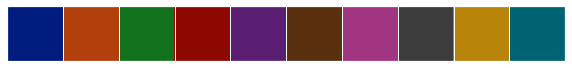

In [35]:
palette_name = 'dark'

sns.set_palette(palette_name)

sns.palplot(sns.color_palette(palette_name))

In [36]:
def compare_trends(case_places, case_tags):
    cases_dict ={}
    for place in case_places:
        for tag in case_tags:
            s2 = hist_trend[(place, tag)]
            if s2 is None:
                continue
            cases_dict[(place, tag)] = s2
    cases_df = pd.DataFrame(cases_dict)
    cases_df.columns = [ "{}: {}".format(p,t) for p,t in cases_df.columns]

    return cases_df

italy_vs_world = compare_trends(('Italy', 'World'), ('confirmed_cases', 'deaths'))

italy_vs_world

Italy: confirmed_cases  Italy: deaths  World: confirmed_cases  \
2020-02-03                     NaN            NaN                0.314838   
2020-02-04                     NaN            NaN                0.266351   
2020-02-05                     NaN            NaN                0.218152   
2020-02-06                     NaN            NaN                0.164098   
2020-02-07                     NaN            NaN                0.132819   
...                            ...            ...                     ...   
2020-04-24                0.015811       0.018161                0.034475   
2020-04-25                0.012616       0.017221                0.033743   
2020-04-26                0.011929       0.014775                0.030558   
2020-04-27                0.009075       0.013238                0.027161   
2020-04-28                0.010335       0.012954                0.025553   

            World: deaths  
2020-02-03       0.362040  
2020-02-04       0.330279  
2020-02-05       0.270372  
2020-02-06       0.219341  
2020-02-07       0.189194  
...                   ...  
2020-04-24       0.038113  
2020-04-25       0.034342  
2020-04-26       0.028961  
2020-04-27       0.025961  
2020-04-28       0.026307  

[86 rows x 4 columns]

In [37]:
def nice_plot(df, title_str=None, colormap=None, pct_format='{:.0%}'):
    ax = df.plot(figsize=(20,12),  title=title_str, marker='o', linewidth=4, markersize=12,
                colormap=colormap)
    ax.yaxis.tick_right()
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: pct_format.format(y))) 
    return ax

nice_plot(italy_vs_world)

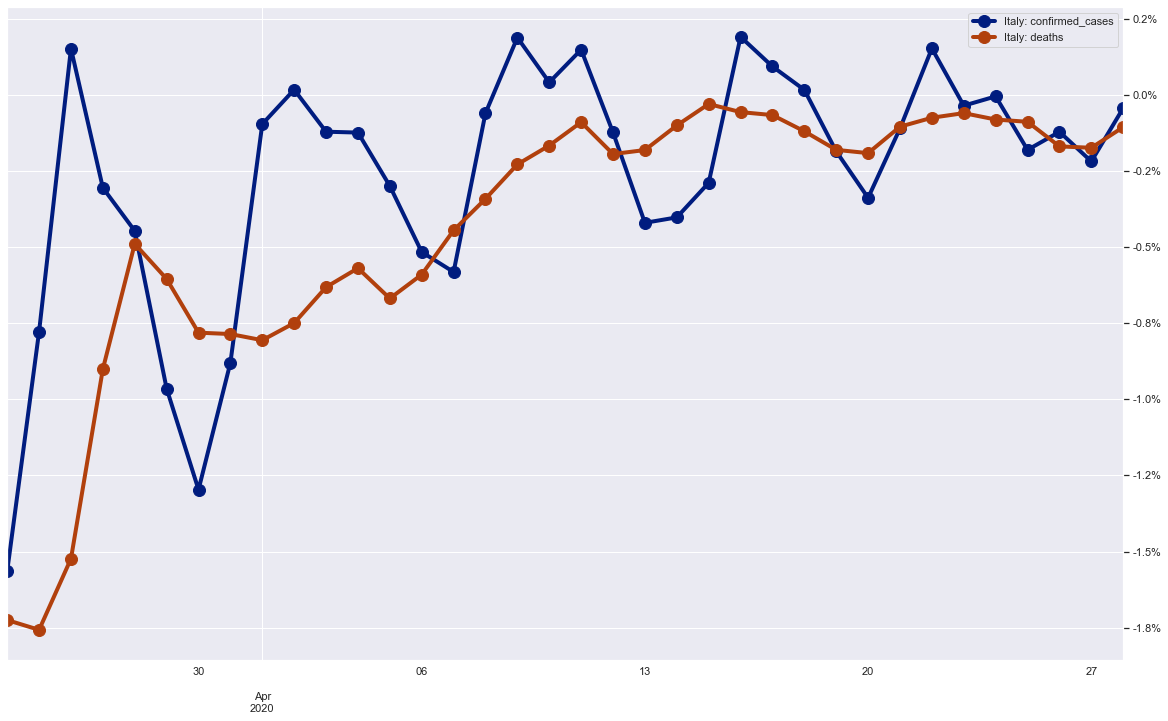

In [38]:
def compare_convx(case_places, case_tags):
    cases_dict ={}
    for place in case_places:
        for tag in case_tags:
            s2 = hist_convx[(place, tag)]
            if s2 is None:
                continue
            cases_dict[(place, tag)] = s2
    cases_df = pd.DataFrame(cases_dict)
    cases_df.columns = [ "{}: {}".format(p,t) for p,t in cases_df.columns]

    return cases_df

italy_vs_world_convx = compare_convx(('Italy', ), ('confirmed_cases', 'deaths'))

nice_plot(italy_vs_world_convx.loc['2020-03-24':], pct_format='{:.1%}')

In [39]:
world_alone_convx =compare_convx(('World',), 
                           ('confirmed_cases', 'deaths'))

#world_alone_convx.rename(columns={"World: confirmed_cases", "World: confirmed cases"},
#                        inplace=True)

#nice_plot(world_alone_convx.loc['2020-02-24':], colormap='RdBu')

world_alone_convx.columns

Index(['World: confirmed_cases', 'World: deaths'], dtype='object')

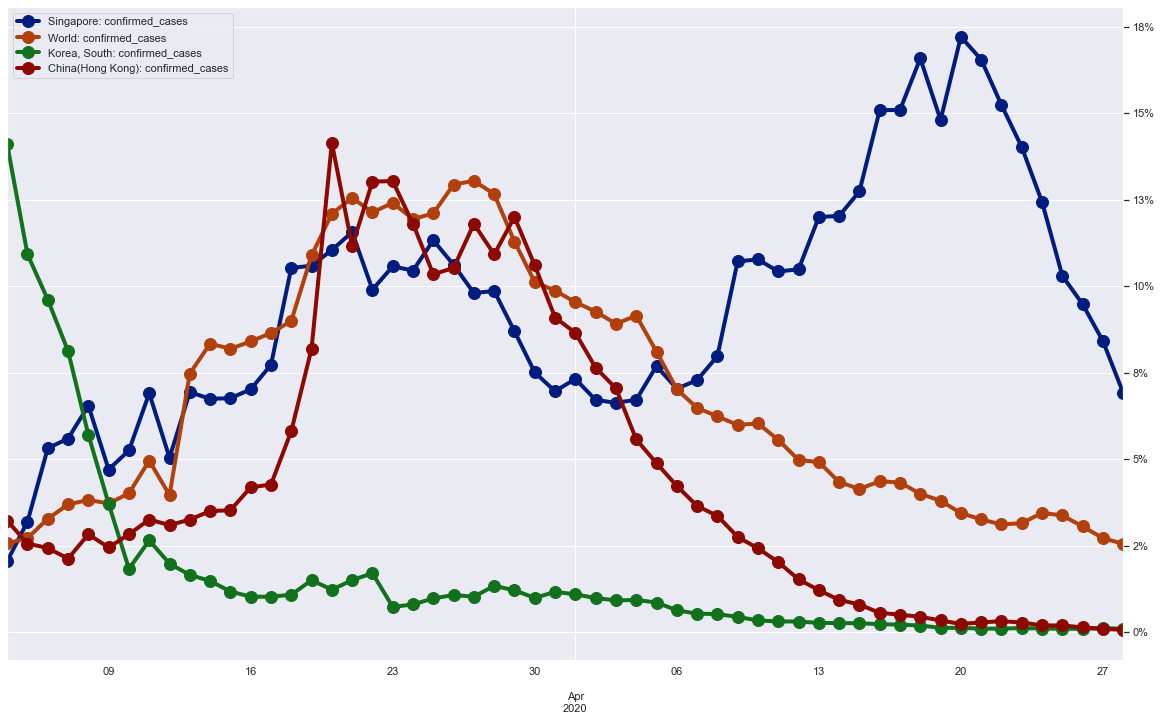

In [40]:
best_places_old =compare_trends(('Singapore', 'World', 'Korea, South', 'China(Hong Kong)'), 
                           ('confirmed_cases', ))

nice_plot(best_places_old.loc['2020-03-04':], colormap=None)

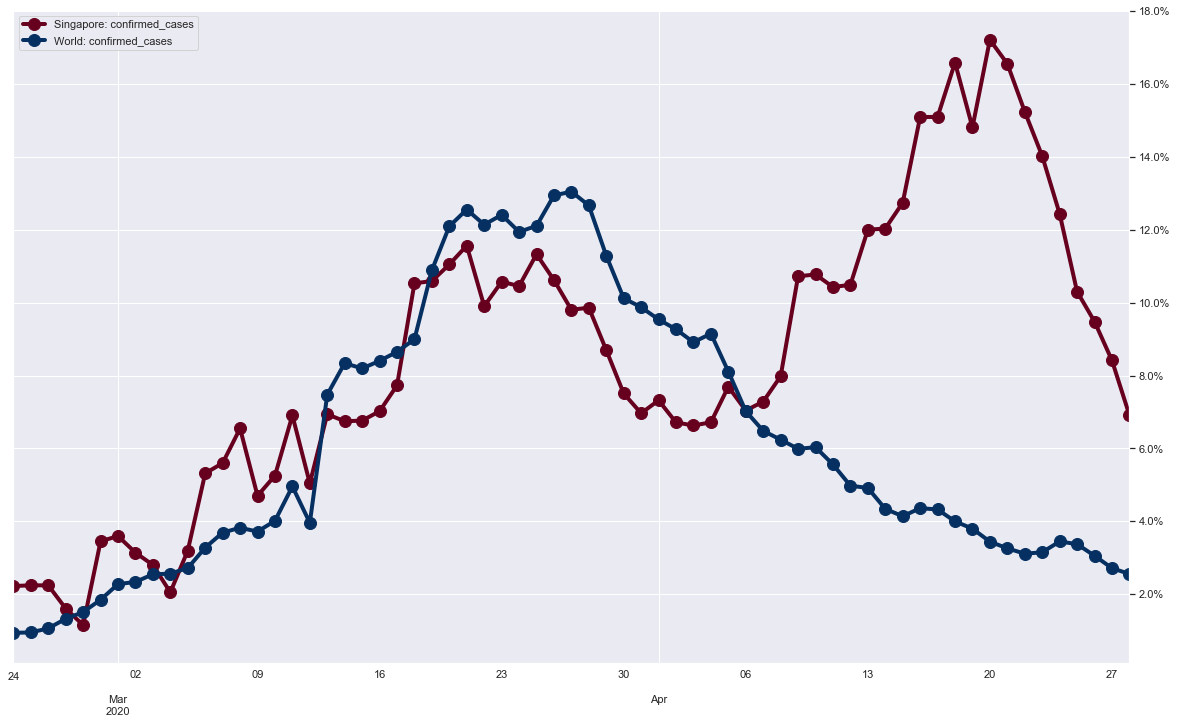

In [41]:
singapore_vs_world_trend = compare_trends(('Singapore', 'World'), ('confirmed_cases', ))

ax = nice_plot(singapore_vs_world_trend.loc['2020-02-24':], colormap='RdBu', pct_format='{:.1%}')

ax.get_figure().savefig('./figs/singapore-vs-world-trend.png')

In [42]:
singapore_vs_world_convx = compare_convx(('Singapore', 'World'), ('confirmed_cases', ))

nice_plot(singapore_vs_world_convx.loc['2020-02-24':], colormap='RdBu', pct_format='{:.1%}')

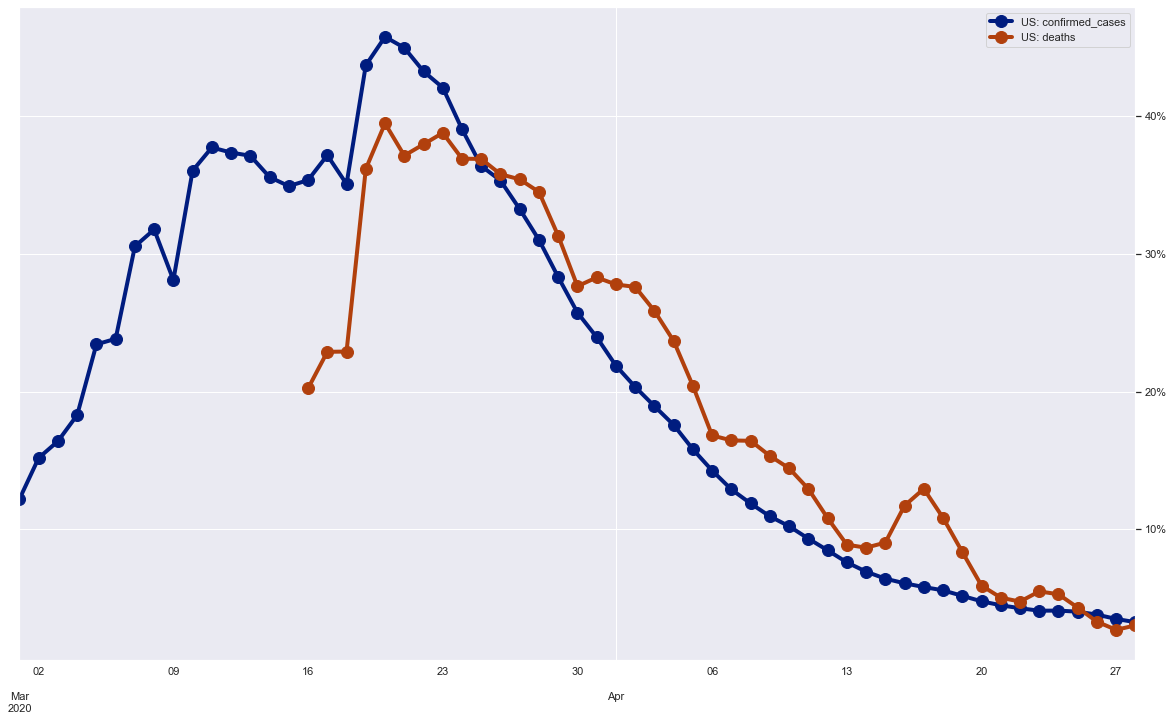

In [43]:
us_trend =compare_trends(('US', ), ('confirmed_cases', 'deaths', ))

nice_plot(us_trend.loc['2020-03-01':])

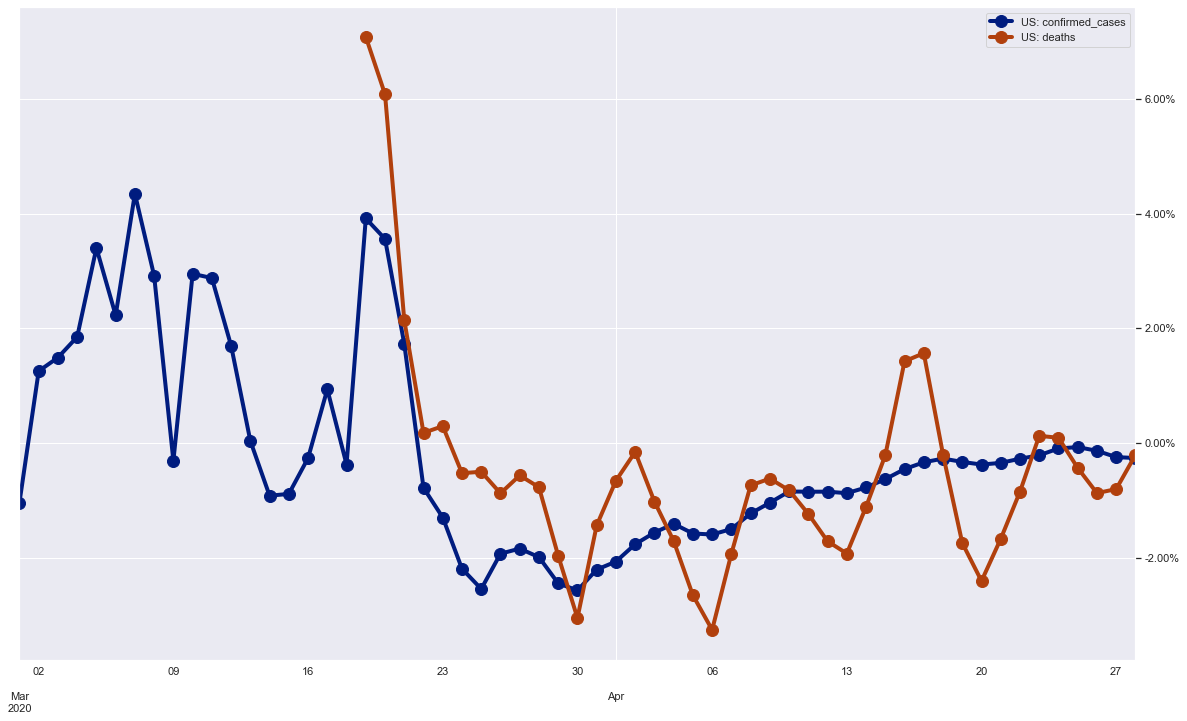

In [44]:
us_convx =compare_convx(('US', ), ('confirmed_cases', 'deaths', ))

nice_plot(us_convx.loc['2020-03-01':], pct_format='{:.2%}')

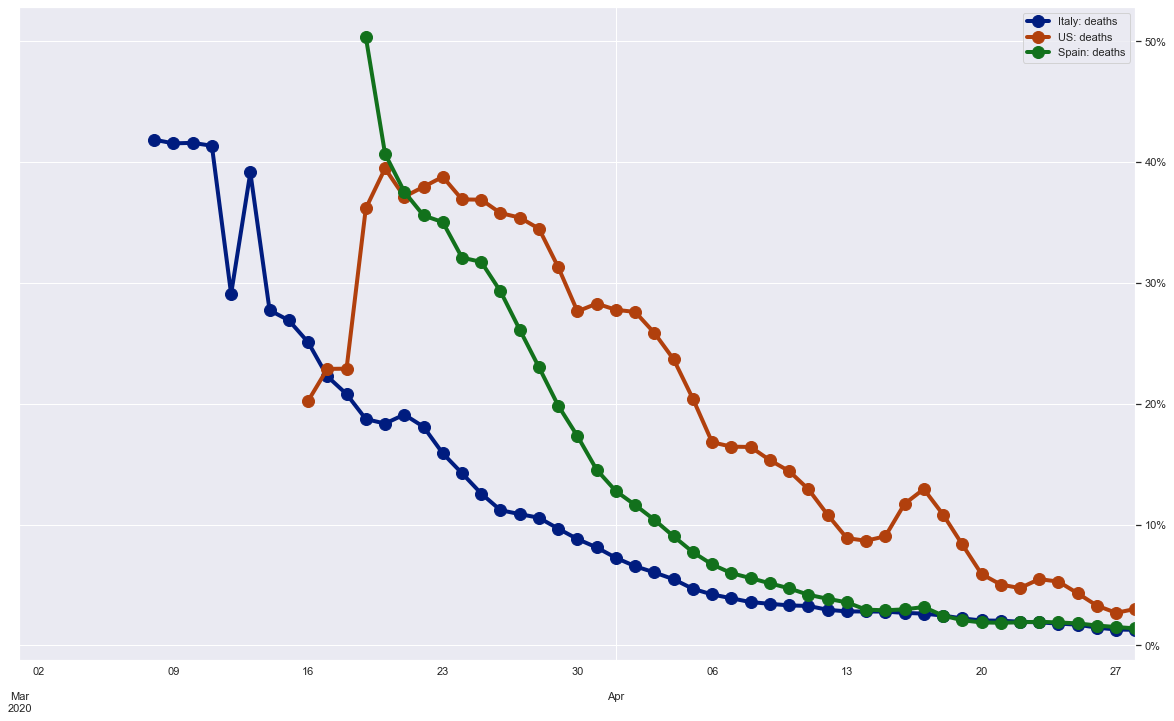

In [45]:
most_hit_places =compare_trends(('Italy', 'US', 'Spain'), ('deaths', ))

nice_plot(most_hit_places.loc['2020-03-01':])

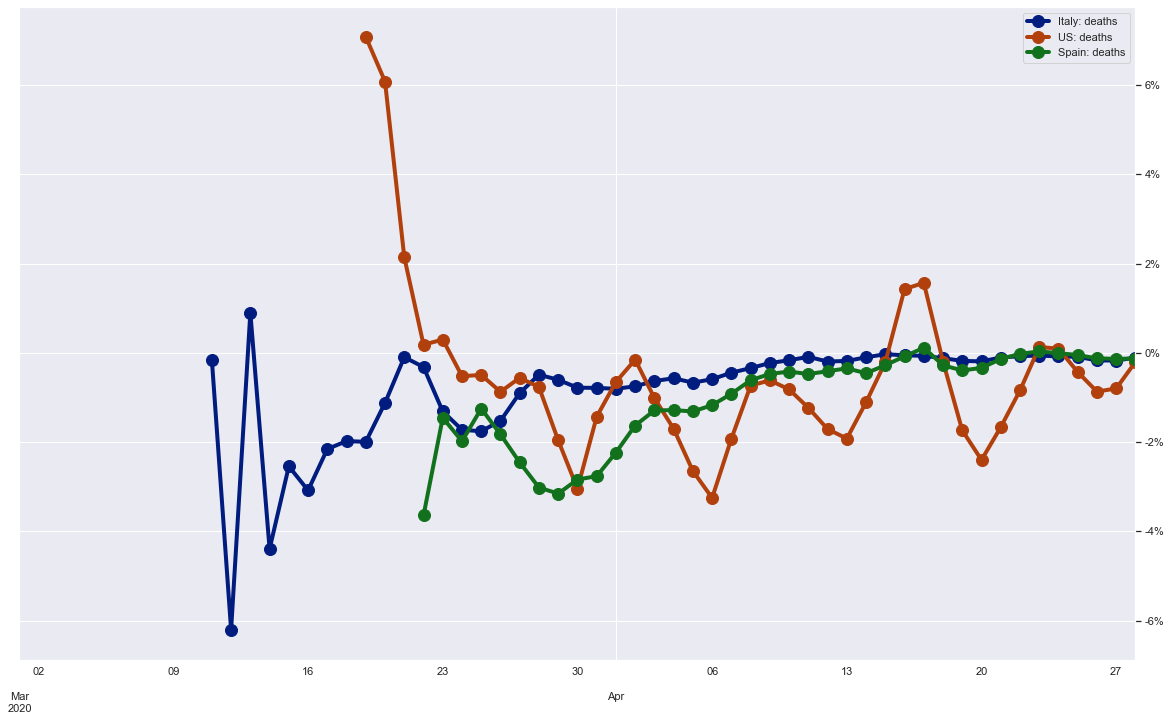

In [46]:
most_hit_places_convx =compare_convx(('Italy', 'US', 'Spain'), ('deaths', ))

nice_plot(most_hit_places_convx.loc['2020-03-01':])

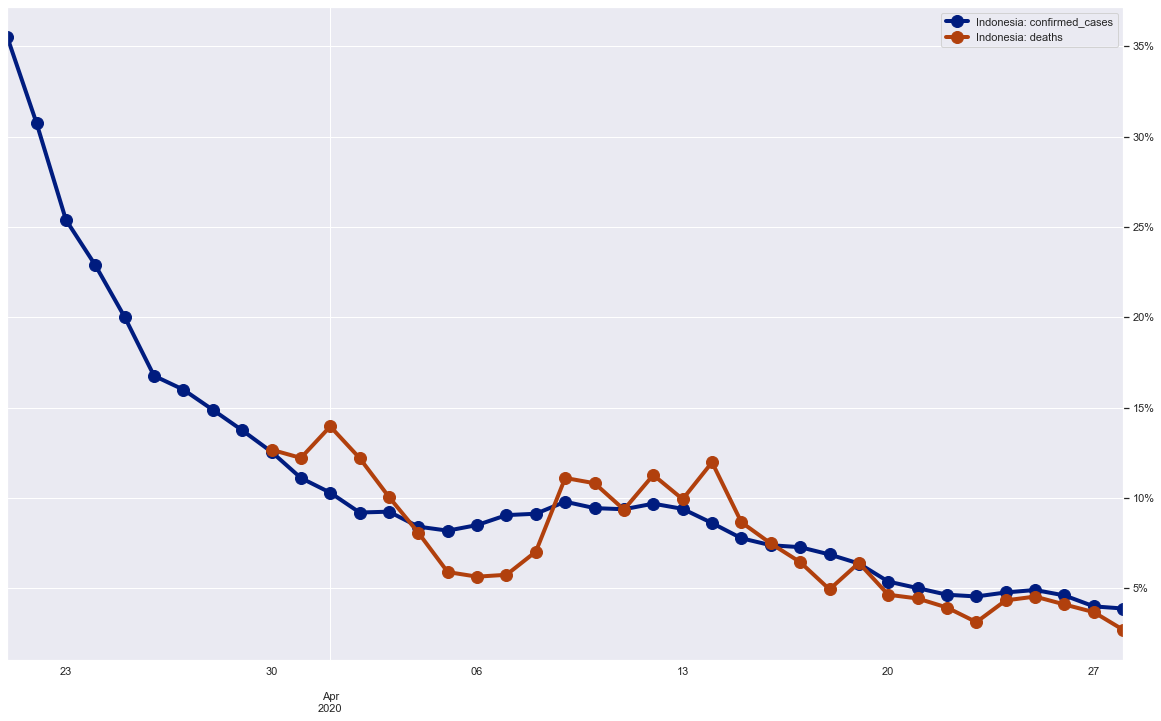

In [47]:
indonesia_trend =compare_trends(('Indonesia',), 
                               ('confirmed_cases', 'deaths'))

nice_plot(indonesia_trend.loc['2020-03-21':])

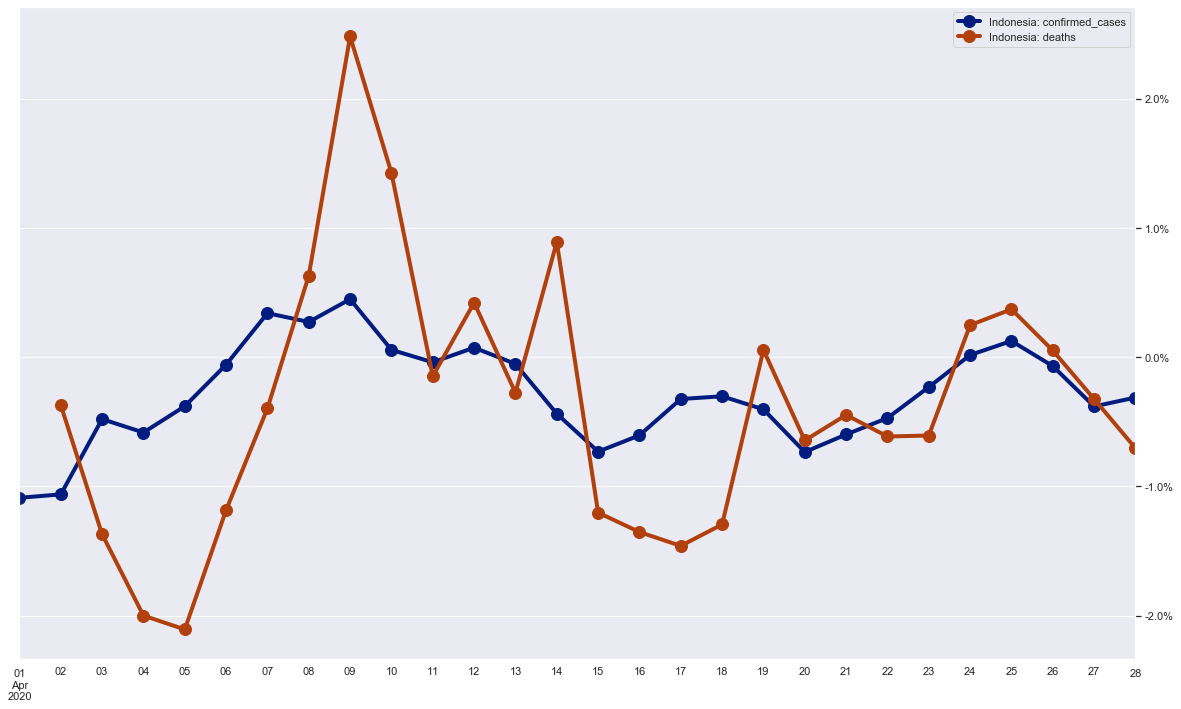

In [48]:
indonesia_convx =compare_convx(('Indonesia',), 
                               ('confirmed_cases', 'deaths'))

nice_plot(indonesia_convx.loc['2020-04-01':], pct_format='{:.1%}')

## Figures for the Medium post

### Singapore 

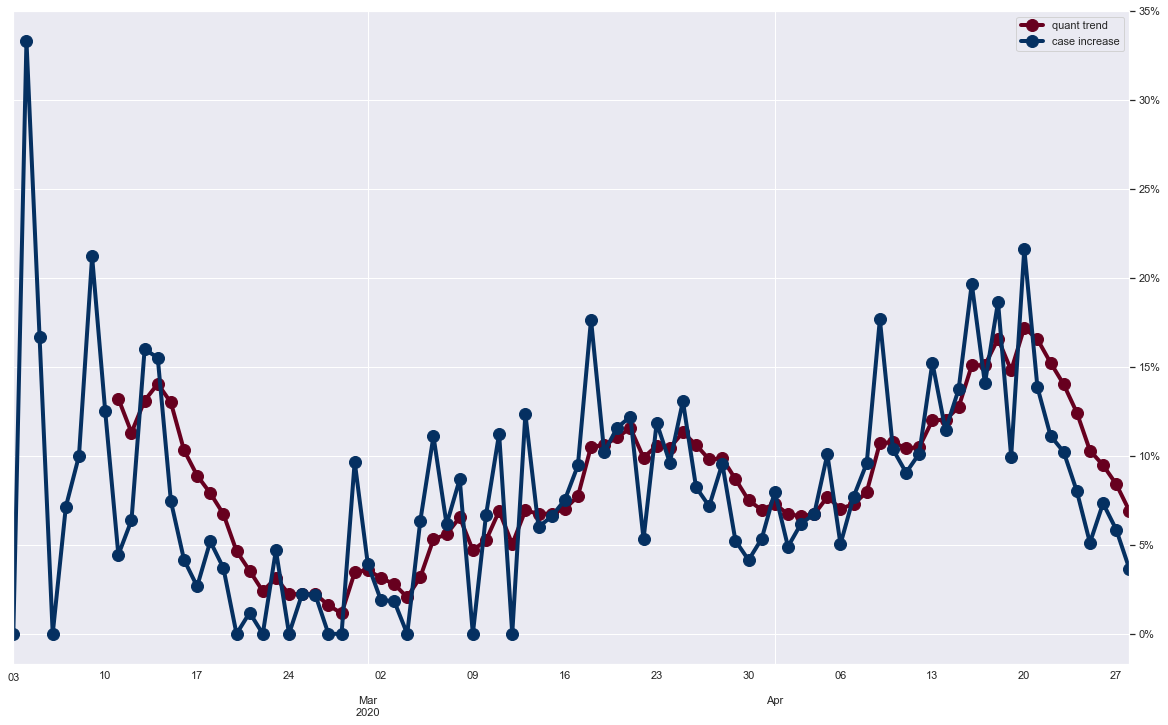

In [49]:
singapore_one_step_trend = global_time_series['Singapore']['confirmed_cases'].pct_change().dropna()

singapore_trend =compare_trends(('Singapore',), ('confirmed_cases', ))

singapore_trend['increase'] = singapore_one_step_trend

singapore_trend.columns=['quant trend', 'case increase']

ax = nice_plot(singapore_trend, colormap='RdBu') # .loc['2020-03-23':]

fig = ax.get_figure()
fig.savefig('./figs/singapore-recent-trend.png')

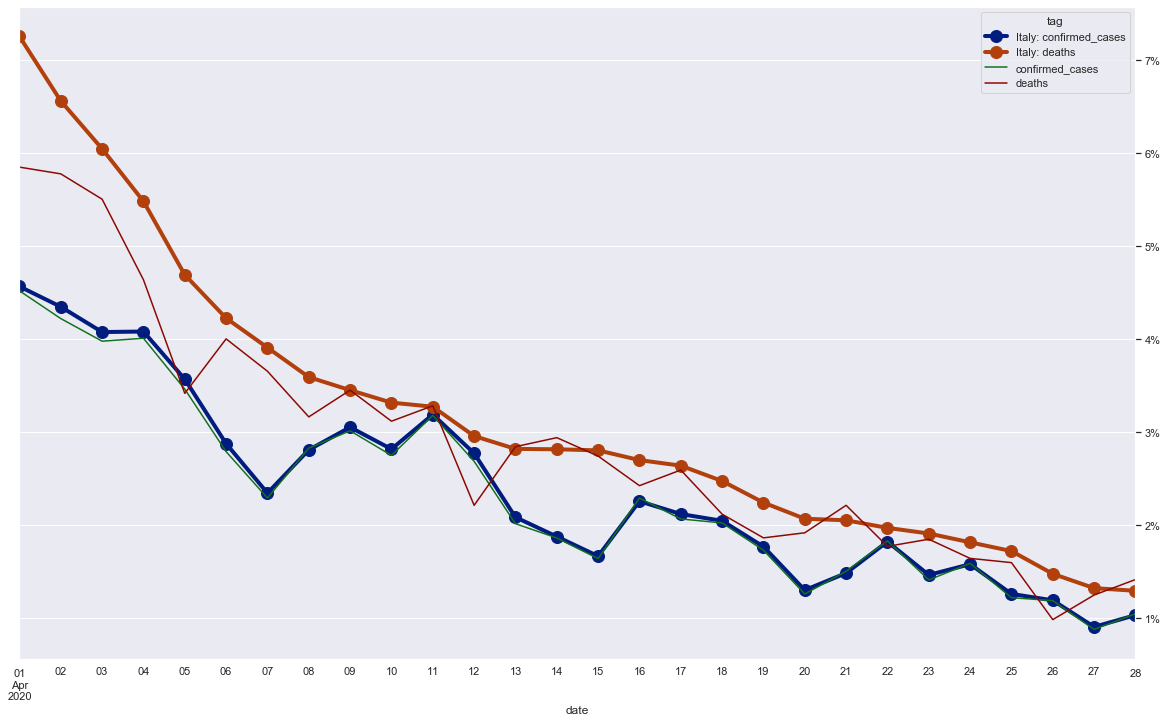

In [50]:
italia_one_step_trend = global_time_series['Italy'][['confirmed_cases', 'deaths']].pct_change().dropna()


#italia_trend['increase'] = italia_one_step_trend

#italia_trend.columns=['quant trend', 'case increase']

italia_trend =compare_trends(('Italy',), ('confirmed_cases', 'deaths'))

ax = nice_plot(italia_trend.loc['2020-04-01':], colormap=None)  

italia_one_step_trend.loc['2020-04-01':].plot(ax=ax)

fig = ax.get_figure()
fig.savefig('./figs/italia-recent-trend.png')

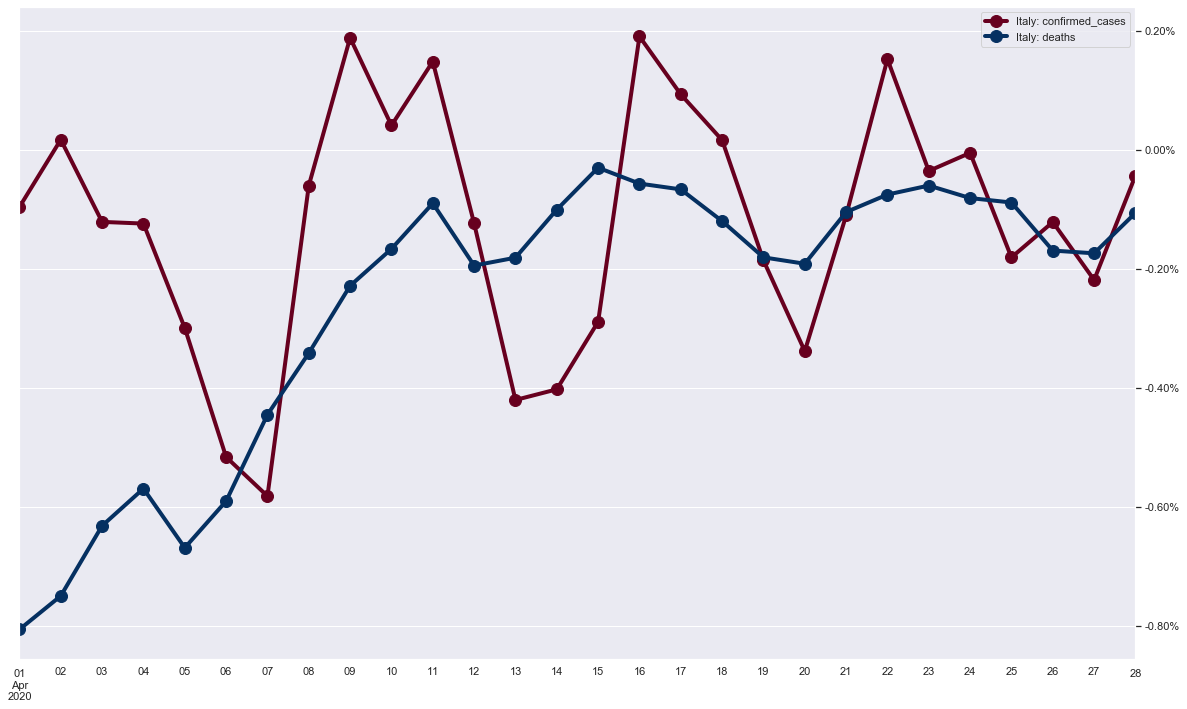

In [51]:
italia_convx =compare_convx(('Italy',), ('confirmed_cases', 'deaths'))


ax = nice_plot(italia_convx.loc['2020-04-01':], colormap='RdBu', pct_format='{:.2%}')  

fig = ax.get_figure()
fig.savefig('./figs/italia-recent-convx.png')

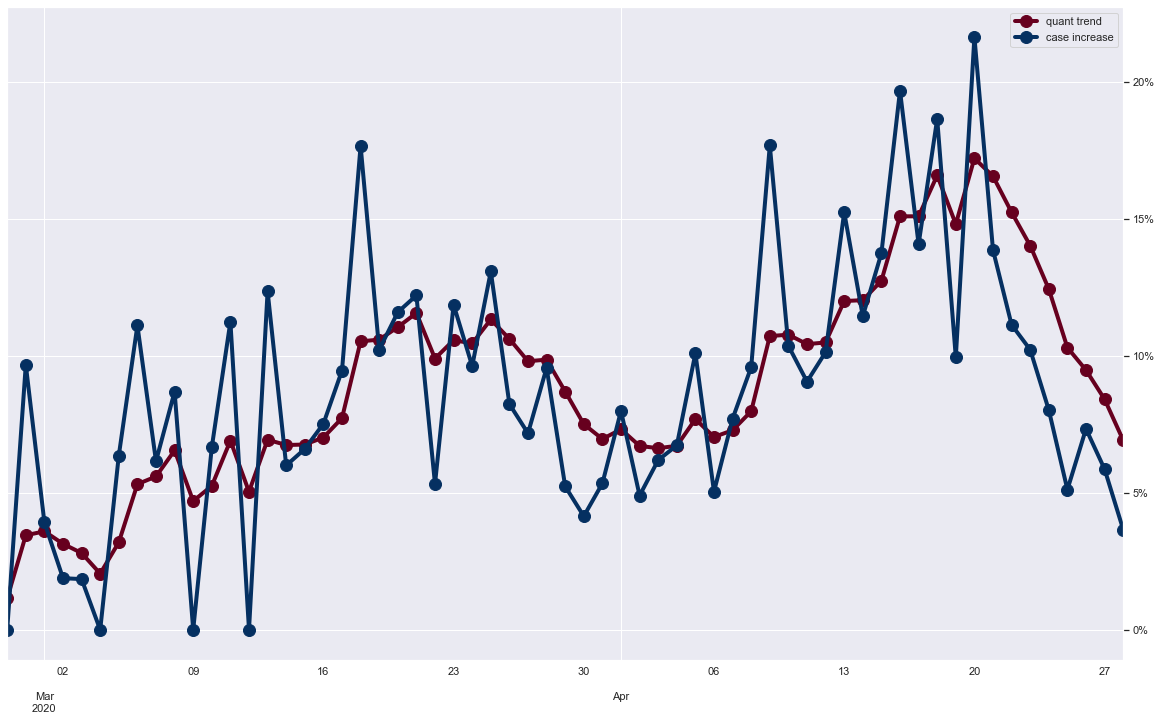

In [52]:
ax = nice_plot(singapore_trend.loc['2020-02-28':], colormap='RdBu')

fig = ax.get_figure()

fig.savefig('./figs/singapore-trend-march2020.png')

### World

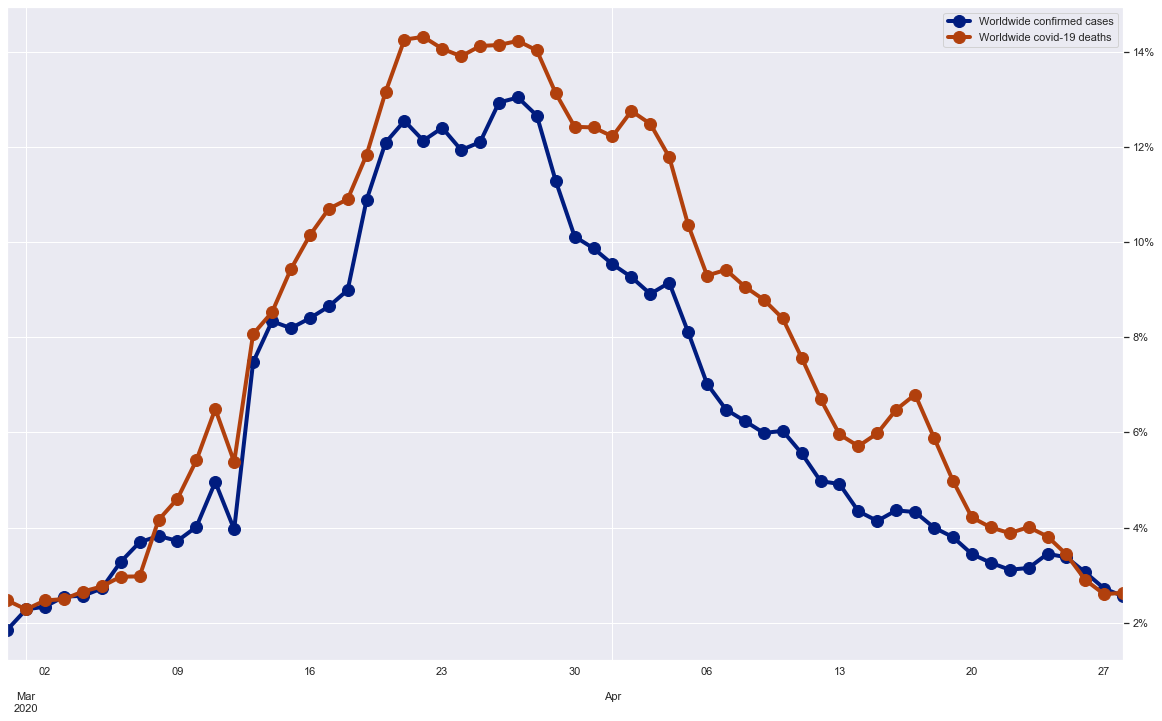

In [53]:
world_alone =compare_trends(('World', ),  ('confirmed_cases', 'deaths'))

world_alone.columns=['Worldwide confirmed cases', 'Worldwide covid-19 deaths']
ax = nice_plot(world_alone.loc['2020-02-29':], colormap=None)

fig = ax.get_figure()

fig.savefig('./figs/world-trend-from-march2020.png')

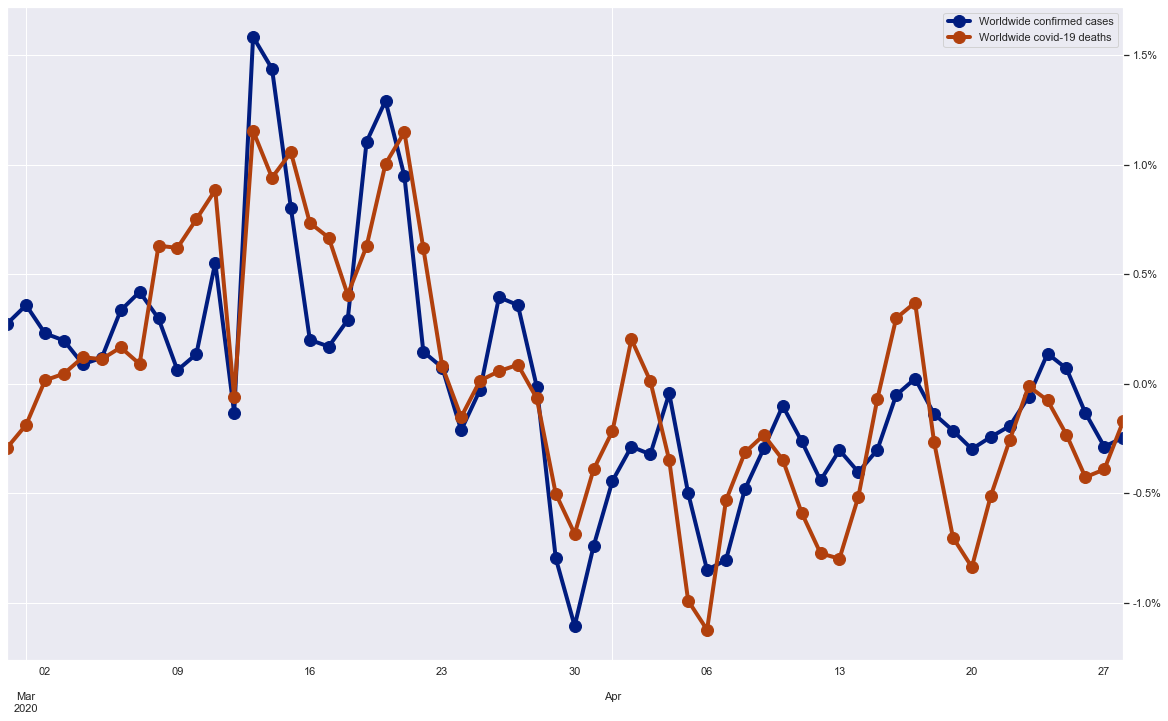

In [54]:
world_alone_convx =compare_convx(('World', ),  ('confirmed_cases', 'deaths'))

world_alone_convx.columns=['Worldwide confirmed cases', 'Worldwide covid-19 deaths']
ax = nice_plot(world_alone_convx.loc['2020-02-29':], colormap=None, pct_format='{:.1%}')

fig = ax.get_figure()

fig.savefig('./figs/world-trend-from-march2020.png')

In [55]:
european_virtuous =compare_trends(('Switzerland', 'Italy', 'Spain', 'New Zealand'), 
                               ('confirmed_cases', ))

european_virtuous.columns=['Switzerland', 'Italy', 'Spain', 'New Zealand']

ax = nice_plot(european_virtuous.loc['2020-03-13':])

fig = ax.get_figure()

fig.savefig('./figs/european-virtuous-from-mid-march2020.png')

In [56]:
european_virtuous_convx =compare_convx(('Switzerland', 'Italy', 'Spain', 'New Zealand'), 
                               ('confirmed_cases', ))

european_virtuous_convx.columns=['Switzerland', 'Italy', 'Spain', 'New Zealand']

ax = nice_plot(european_virtuous_convx.loc['2020-03-23':], pct_format='{:.1%}', colormap=None)

fig = ax.get_figure()

fig.savefig('./figs/european-virtuous-convex-end-march2020.png')

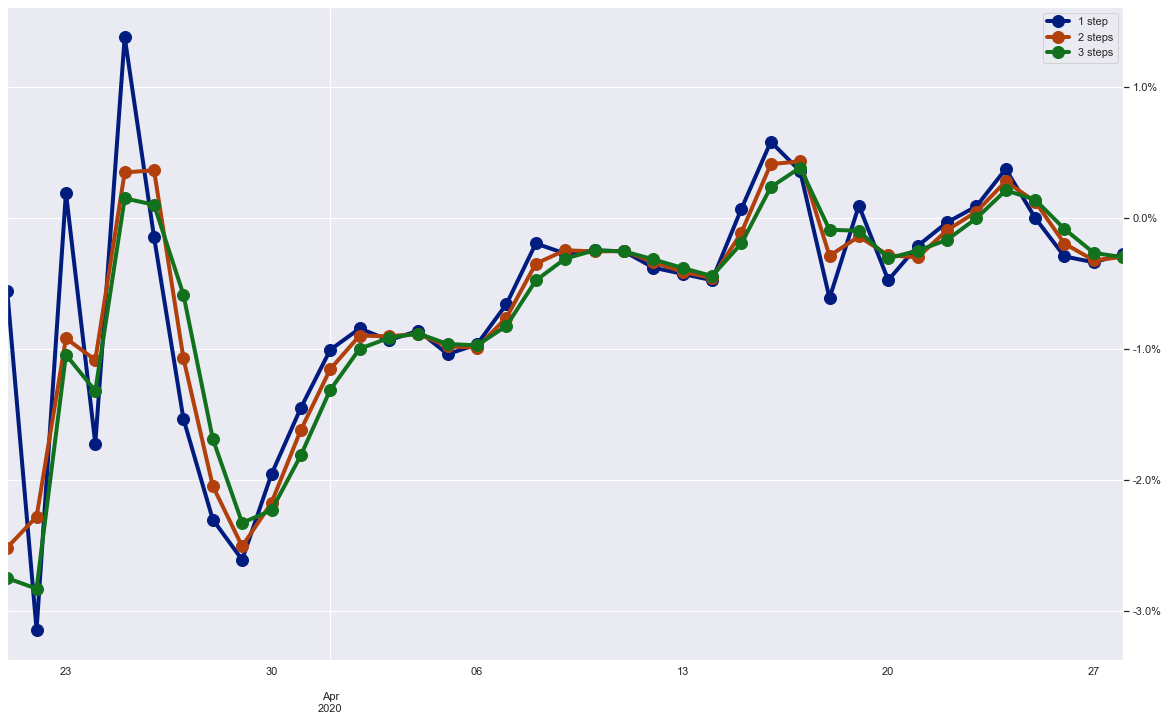

In [57]:
italy_confirmed = hist_trend[('Spain', 'confirmed_cases')].dropna()

italy_steps = pd.DataFrame({
'1 step': llt.one_step_right_slope(italy_confirmed),
'2 steps': llt.two_steps_right_slope(italy_confirmed),
'3 steps': llt.three_steps_right_slope(italy_confirmed)    ,
}).dropna()

ax = nice_plot(italy_steps.loc['2020-03-21':], pct_format='{:.1%}', colormap=None)

fig = ax.get_figure()

fig.savefig('./figs/italy-convexity-steps.png')

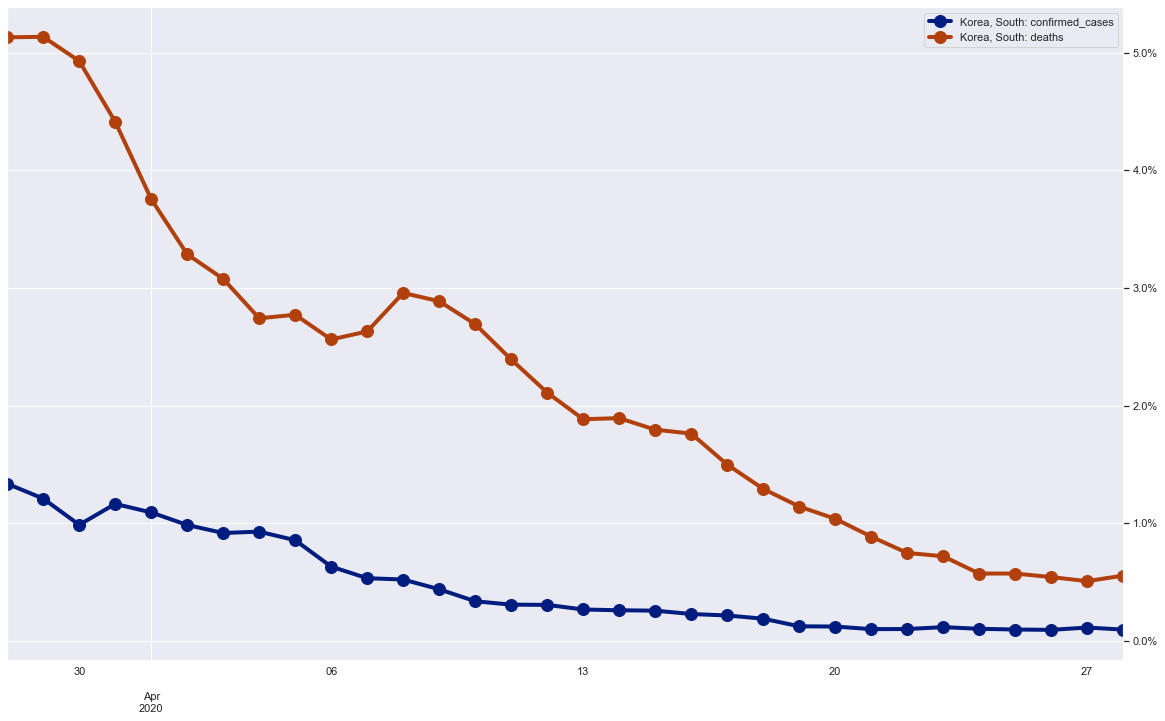

In [58]:
korea_trends = compare_trends(('Korea, South',), ('confirmed_cases', 'deaths'))

ax = nice_plot(korea_trends.loc['2020-03-28':], pct_format='{:.1%}')

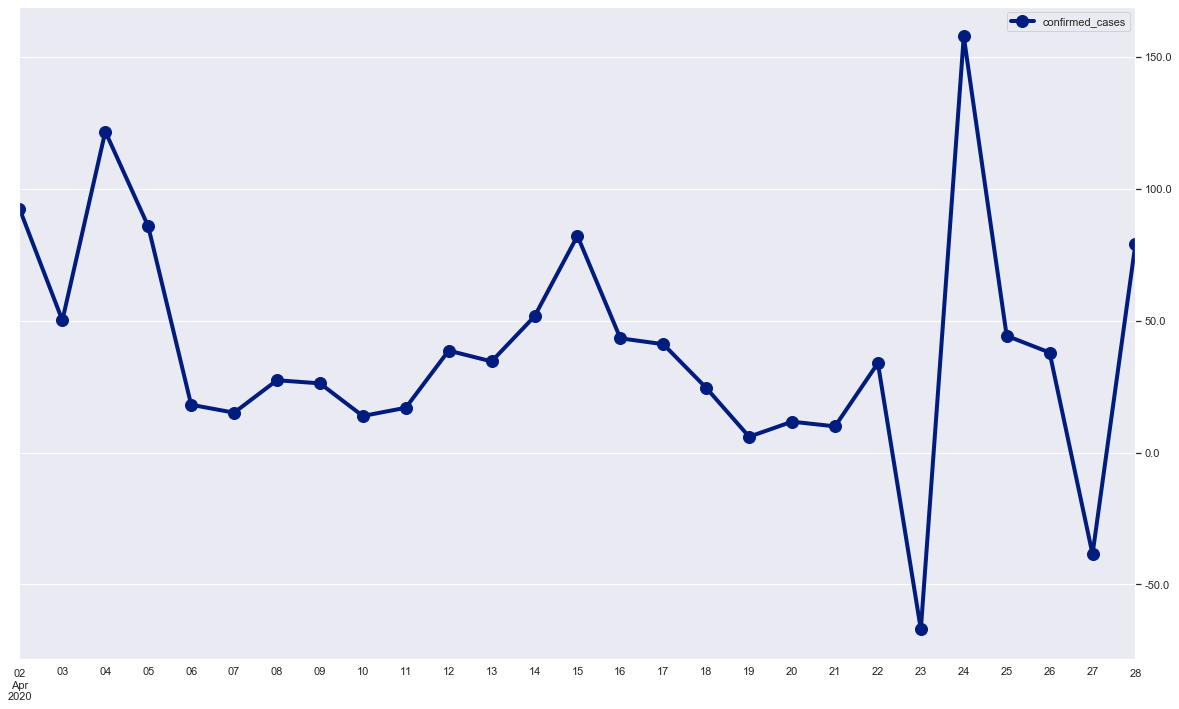

In [59]:
korea_convx = hist_convx['Korea, South']
korea_trend = hist_trend['Korea, South']
korea_ts = global_time_series['Korea, South'].diff()

korea_days_remaining = (-korea_trend/korea_convx)* (korea_ts.apply(np.log))

ax = nice_plot(korea_days_remaining.loc['2020-04-02':][['confirmed_cases']], pct_format='{:.1f}')

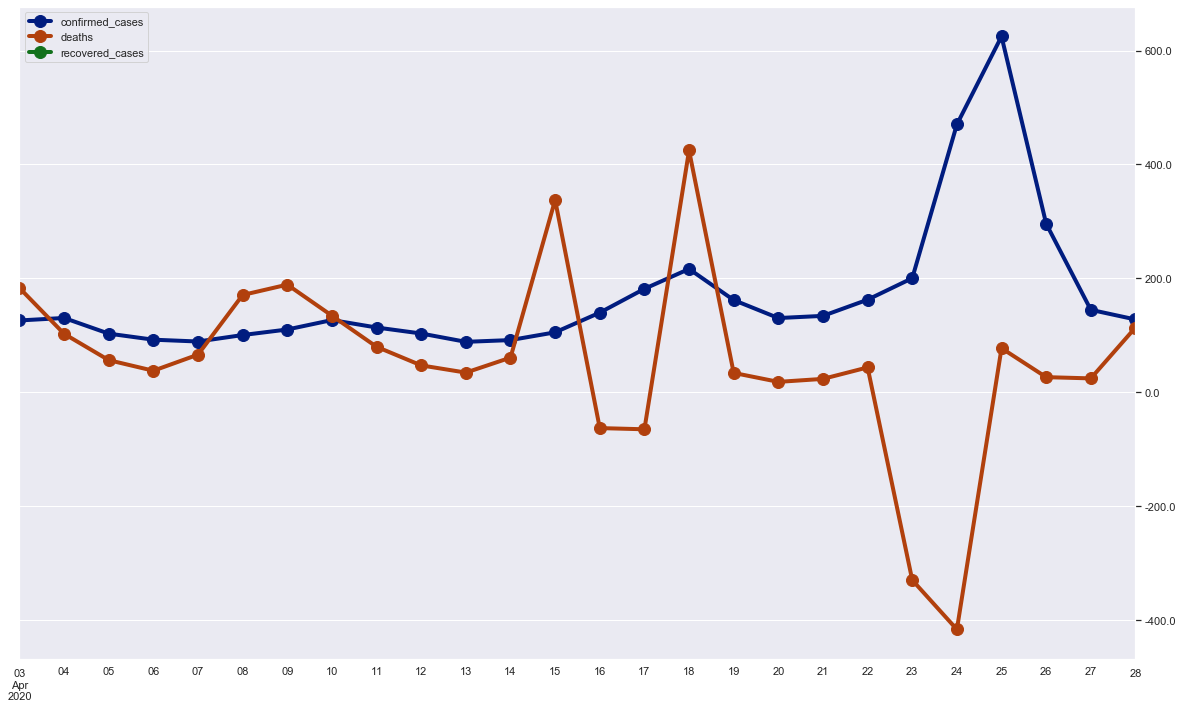

In [60]:
us_convx = hist_convx['US']
us_trends = hist_trend['US']
us_ts = global_time_series['US'].diff()

us_days_remaining = (-us_trends/us_convx)* (us_ts.apply(np.log))[['confirmed_cases','deaths']]

ax = nice_plot(us_days_remaining.loc['2020-04-03':], pct_format='{:.1f}')

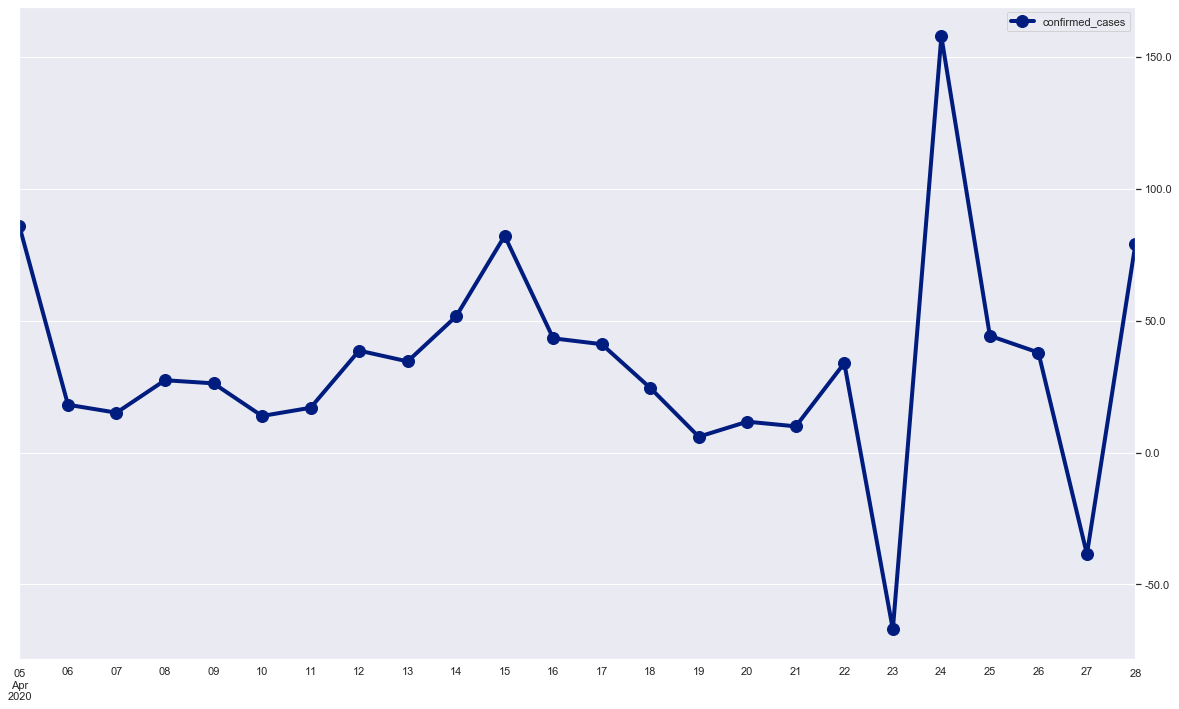

In [61]:
kiwi_convx = hist_convx['New Zealand']
kiwi_trend = hist_trend['New Zealand']
kiwi_ts = global_time_series['New Zealand'].diff()

kiwi_days_remaining = (-korea_trend/korea_convx)* (korea_ts.apply(np.log))

ax = nice_plot(kiwi_days_remaining.loc['2020-04-05':][['confirmed_cases']], pct_format='{:.1f}')

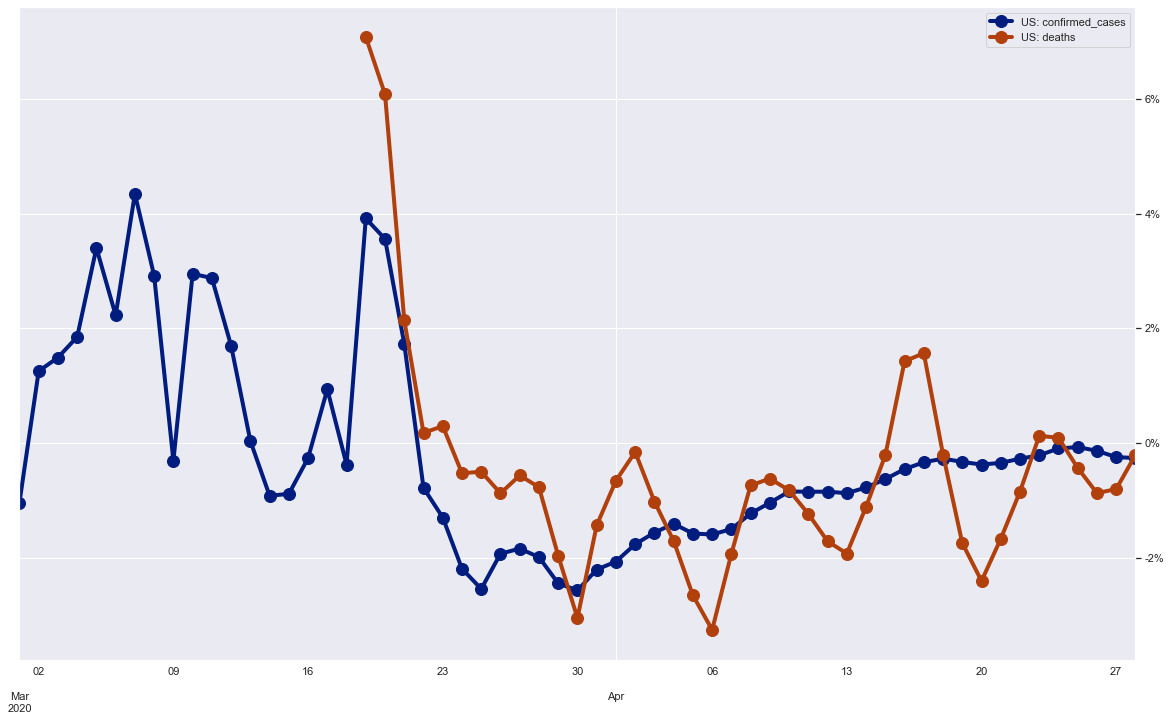

In [62]:
us_convx =compare_convx(('US', ), ('confirmed_cases', 'deaths', ))

nice_plot(us_convx.loc['2020-03-01':])


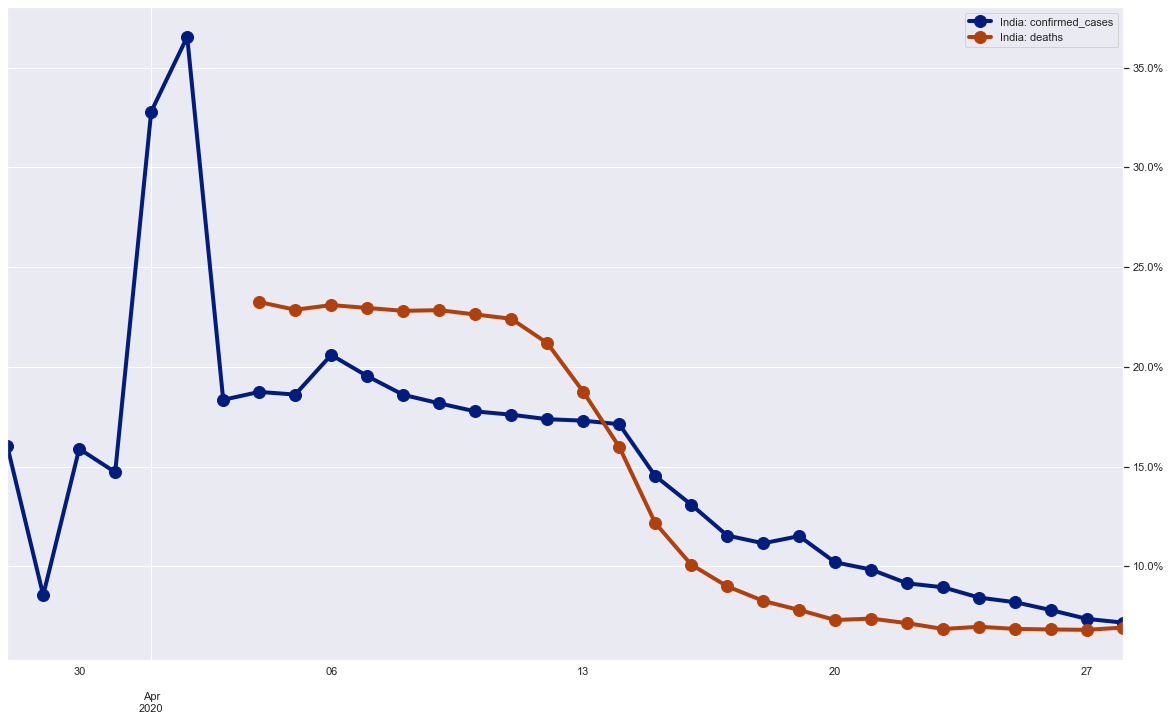

In [63]:
india_trends = compare_trends(('India',), ('confirmed_cases', 'deaths'))

ax = nice_plot(india_trends.loc['2020-03-28':], pct_format='{:.1%}')

ax.get_figure().savefig('./figs/india-trends.png')